AI core, EDA customer online shoping

1 - Executed on the cd_utils.py, download the dataset stored in AWS RDS

2 - Investigate the data, looking for inaccuracies, nulls, trends and outliers.

3 - Data analysis and visualisation to answer business questions.

In [235]:
from datatransform import DataFrameTransform
from datatransform import DataFrameInfo
from datatransform import Plotter
from tabulate import tabulate
from typing import List
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import normaltest
import math




Milestone 2.1 + 2.2 - Using db_utils.py, call credentials stored in credentials.yaml to download file from AWS RDS. Credentials.yaml to be add to git ignore. File to be saved as customer_activity.csv.

Milestone 2.3 - First look at the data, print data head to familiarize with the data

In [236]:
customer_activity_df = pd.read_csv("customer_activity.csv")
customer_activity_df.head()

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.0,4.0,0.0,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,26.0,876.0,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2.0,99.4,0,0.0,19.0,368.0,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0.0,0.0,0,0.0,20.0,1432.0,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0.0,0.0,0,0.0,33.0,694.0,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False


Milestone 2.3 - Information regarding collumns and what information they contain

    - administrative: Columns which indicate which administrative activity the user was performing on their account
    - administrative_duration: How long a user performed administrative tasks in that session
    - informational: Indicates which informational activity the user was performing on the website
    - informational_duration: How long a users performed informational tasks in seconds during that session
    - product_related: Indicates which product the user was viewing on the website
    - product_related_duration: How long a user browsed products during that session
    - bounce_rates: Historical bounce rate of that particular page for all users (that visited the website and immediately exited)
    - exit_rates: Historical exit rate of the users from that particular page.
    - page_values: The average value contribution of a page to a customer sale
    - month: The month the user's activity took place
    - operating_systems: The operating system the user was using
    - browser: The browser the user was using
    - region: The region the user originated from
    - traffic_type: How the user was redirected to the site
    - visitor_type: Whether a customer was new, returning or other
    - weekend: Whether the activity only took place during the weekend
    - revenue: Whether the customer purchased anything during that session

Milestone 2.3 - print df info to better understand size and data type

In [237]:
DataFrameInfo.columns_info(customer_activity_df)

Column caracteristics
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            11760 non-null  float64
 1   administrative_duration   11418 non-null  float64
 2   informational             12330 non-null  int64  
 3   informational_duration    11994 non-null  float64
 4   product_related           11751 non-null  float64
 5   product_related_duration  12129 non-null  float64
 6   bounce_rates              12330 non-null  float64
 7   exit_rates                12330 non-null  float64
 8   page_values               12330 non-null  float64
 9   month                     12330 non-null  object 
 10  operating_systems         12319 non-null  object 
 11  browser                   12330 non-null  object 
 12  region                    12330 non-null  object 
 13  traffic_type              12330 non-nul

Milestone 3.1 - to help data analysis and facilitate possible future machine learning, weekend and revenue columns to be converted to int, similar to month. Objects to be converted to categorical.
weekeend  - from True/False to 0 if not or 1 if during weekend
revenue - from True/False to 0 if not or 1 if revenue achieved
Month - from Jan, Feb, Mar ... to 1, 2, 3 ...
customer_activity_df to remain as original for future comparisons, new transformed data marked as ca_data


In [238]:
transformer = DataFrameTransform(customer_activity_df)

ca_data = transformer.convert_columns(['weekend','revenue'],'int')
# ca_data = transformer.convert_columns(['browser','region','traffic_type','operating_systems','visitor_type'],'categorical') Scrap this, getting me troubles in the questions part, can stay as object
ca_data = transformer.convert_month_to_int('month')


Milestone 3.2   - print converted head and info for comparison
                - extract statistical values
                - count distinct values
                - print out df shape
                - get null count and %

In [239]:
ca_data.head()

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.0,4.0,0.0,0.2000,0.200,0.0,5,Android,Google Chrome,North America,Twitter,Returning_Visitor,0,0
1,0.0,0.0,0,0.0,26.0,876.0,0.0000,0.026,0.0,11,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,1,0
2,2.0,99.4,0,0.0,19.0,368.0,0.0396,0.052,0.0,9,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,0,0
3,0.0,0.0,0,0.0,20.0,1432.0,0.0248,0.028,1.8,12,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,0,1
4,0.0,0.0,0,0.0,33.0,694.0,0.0141,0.032,0.0,5,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,0,0


In [240]:
DataFrameInfo.columns_info(ca_data)

Column caracteristics
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            11760 non-null  float64
 1   administrative_duration   11418 non-null  float64
 2   informational             12330 non-null  int64  
 3   informational_duration    11994 non-null  float64
 4   product_related           11751 non-null  float64
 5   product_related_duration  12129 non-null  float64
 6   bounce_rates              12330 non-null  float64
 7   exit_rates                12330 non-null  float64
 8   page_values               12330 non-null  float64
 9   month                     12330 non-null  int64  
 10  operating_systems         12319 non-null  object 
 11  browser                   12330 non-null  object 
 12  region                    12330 non-null  object 
 13  traffic_type              12330 non-nul

In [241]:
DataFrameInfo.null_counts(ca_data)

NULL COUNT
administrative              570
administrative_duration     912
informational                 0
informational_duration      336
product_related             579
product_related_duration    201
bounce_rates                  0
exit_rates                    0
page_values                   0
month                         0
operating_systems            11
browser                       0
region                        0
traffic_type                  0
visitor_type                  0
weekend                       0
revenue                       0
dtype: int64


In [242]:
DataFrameInfo.null_percentage(ca_data)

NULL %
administrative              4.622871
administrative_duration     7.396594
informational               0.000000
informational_duration      2.725061
product_related             4.695864
product_related_duration    1.630170
bounce_rates                0.000000
exit_rates                  0.000000
page_values                 0.000000
month                       0.000000
operating_systems           0.089213
browser                     0.000000
region                      0.000000
traffic_type                0.000000
visitor_type                0.000000
weekend                     0.000000
revenue                     0.000000
dtype: float64


In [243]:
DataFrameInfo.shape(ca_data)  

The shape of the data is: (12330, 17)


In [244]:
ca_data.describe()
# DataFrameInfo.statistics_info(ca_data)

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,weekend,revenue
count,11760.000000,11418.000000,12330.000000,11994.000000,11751.000000,12129.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.308844,84.539079,0.497080,34.486687,32.814824,1192.426086,0.022381,0.042820,5.556310,7.731306,0.206407,0.154826
std,3.364905,179.392485,1.174194,136.201557,44.597841,1767.243802,0.048847,0.048578,17.397345,3.388956,0.404743,0.361753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,192.000000,0.000000,0.014000,0.000000,5.000000,0.000000,0.000000
50%,1.000000,6.000000,0.000000,0.000000,18.000000,586.000000,0.003500,0.025000,0.000000,8.000000,0.000000,0.000000
75%,4.000000,95.000000,0.000000,0.000000,38.000000,1425.000000,0.017600,0.049000,0.000000,11.000000,0.000000,0.000000
max,24.000000,2155.000000,12.000000,1988.750000,485.000000,23866.000000,0.200000,0.200000,254.600000,12.000000,1.000000,1.000000


Milestone 3.3 - remove/replace null values
Starting on operating systems, on the exploration of null counts and %, it identified 11 null values, accounting for 0.089% of the data.
On unique values, it has 7 entries. It's a category column, so we're unable to input depending on statistics.
If there's a category taking the vast majority of the counts, or if it's correlated with another column missing values, we'll investigate further, otherwise drop the null values.



<Axes: >

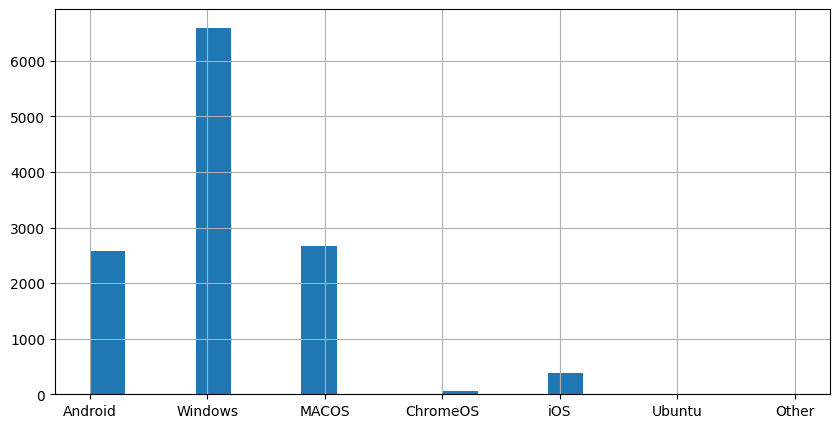

In [245]:
ca_data['operating_systems'].hist(bins=20, figsize=(10,5))

<Axes: >

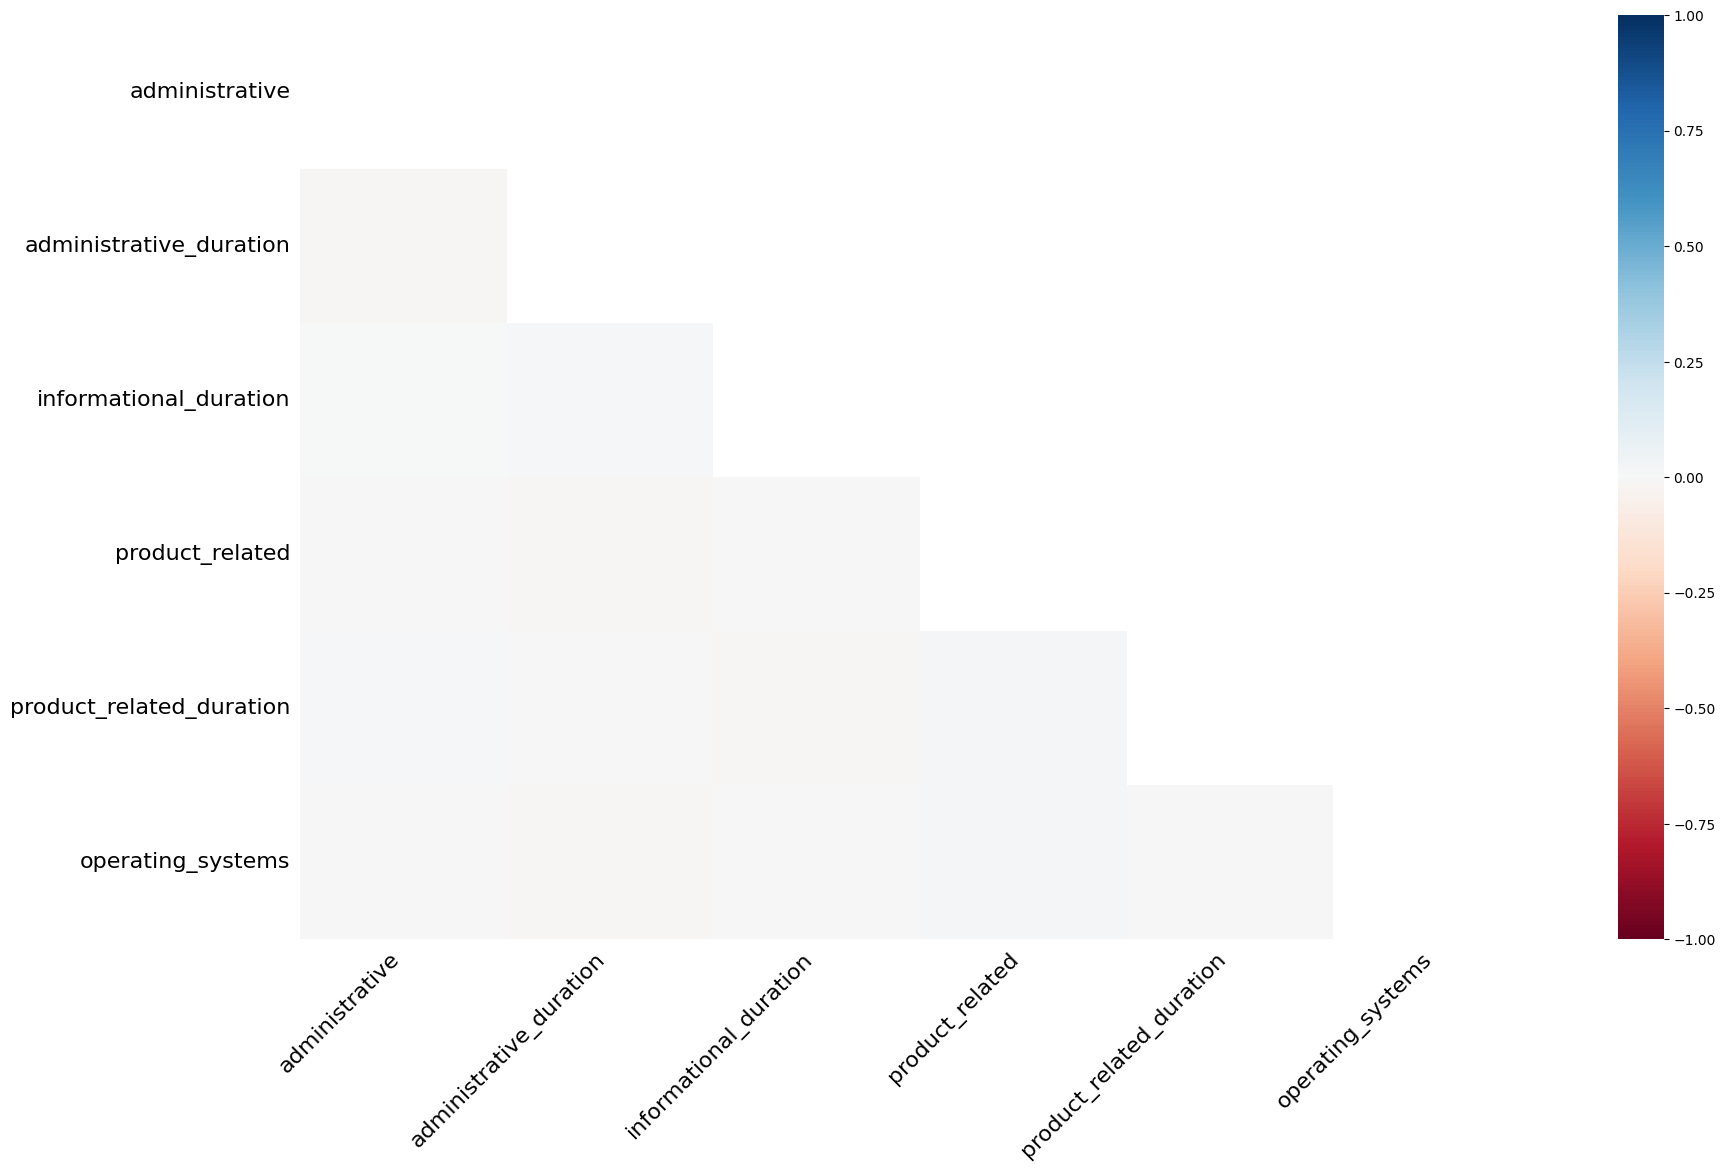

In [246]:
msno.heatmap(ca_data)

In [247]:
print(ca_data['operating_systems'].value_counts())

operating_systems
Windows     6596
MACOS       2676
Android     2584
iOS          385
ChromeOS      62
Ubuntu         9
Other          7
Name: count, dtype: int64


Win is the mode, but still the combined counts of android and Mac are similar to Win, plus there doesn't seem to be a correlation to another column. As only accounting for 0.089% of the df, the nulls on this collumns could be replaced by mode, but as one of the business analysis questions is what operating systems are used, we will be dropping the rows with nulls in this column since they represent such a small amount.

Milestone 3.3 - dropping null values on operating_systems column.
shape of before and after drop to confirm loss of 11 rows

In [248]:
ca_data_cleaned = ca_data.dropna(subset=["operating_systems"])
DataFrameInfo.shape(ca_data)
DataFrameInfo.shape(ca_data_cleaned)  

The shape of the data is: (12330, 17)
The shape of the data is: (12319, 17)


With the small null missing resolved, we'll look at the columns with a large amount of null, and how to input the missing values.
first we'll look at the % and if they are related. We already seen that there's no relation between the categories that have null values within the heatmap, as all acored 0. Source https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/

In [249]:
DataFrameInfo.null_percentage(ca_data_cleaned)

NULL %
administrative              4.626999
administrative_duration     7.403198
informational               0.000000
informational_duration      2.727494
product_related             4.683822
product_related_duration    1.631626
bounce_rates                0.000000
exit_rates                  0.000000
page_values                 0.000000
month                       0.000000
operating_systems           0.000000
browser                     0.000000
region                      0.000000
traffic_type                0.000000
visitor_type                0.000000
weekend                     0.000000
revenue                     0.000000
dtype: float64


<Axes: >

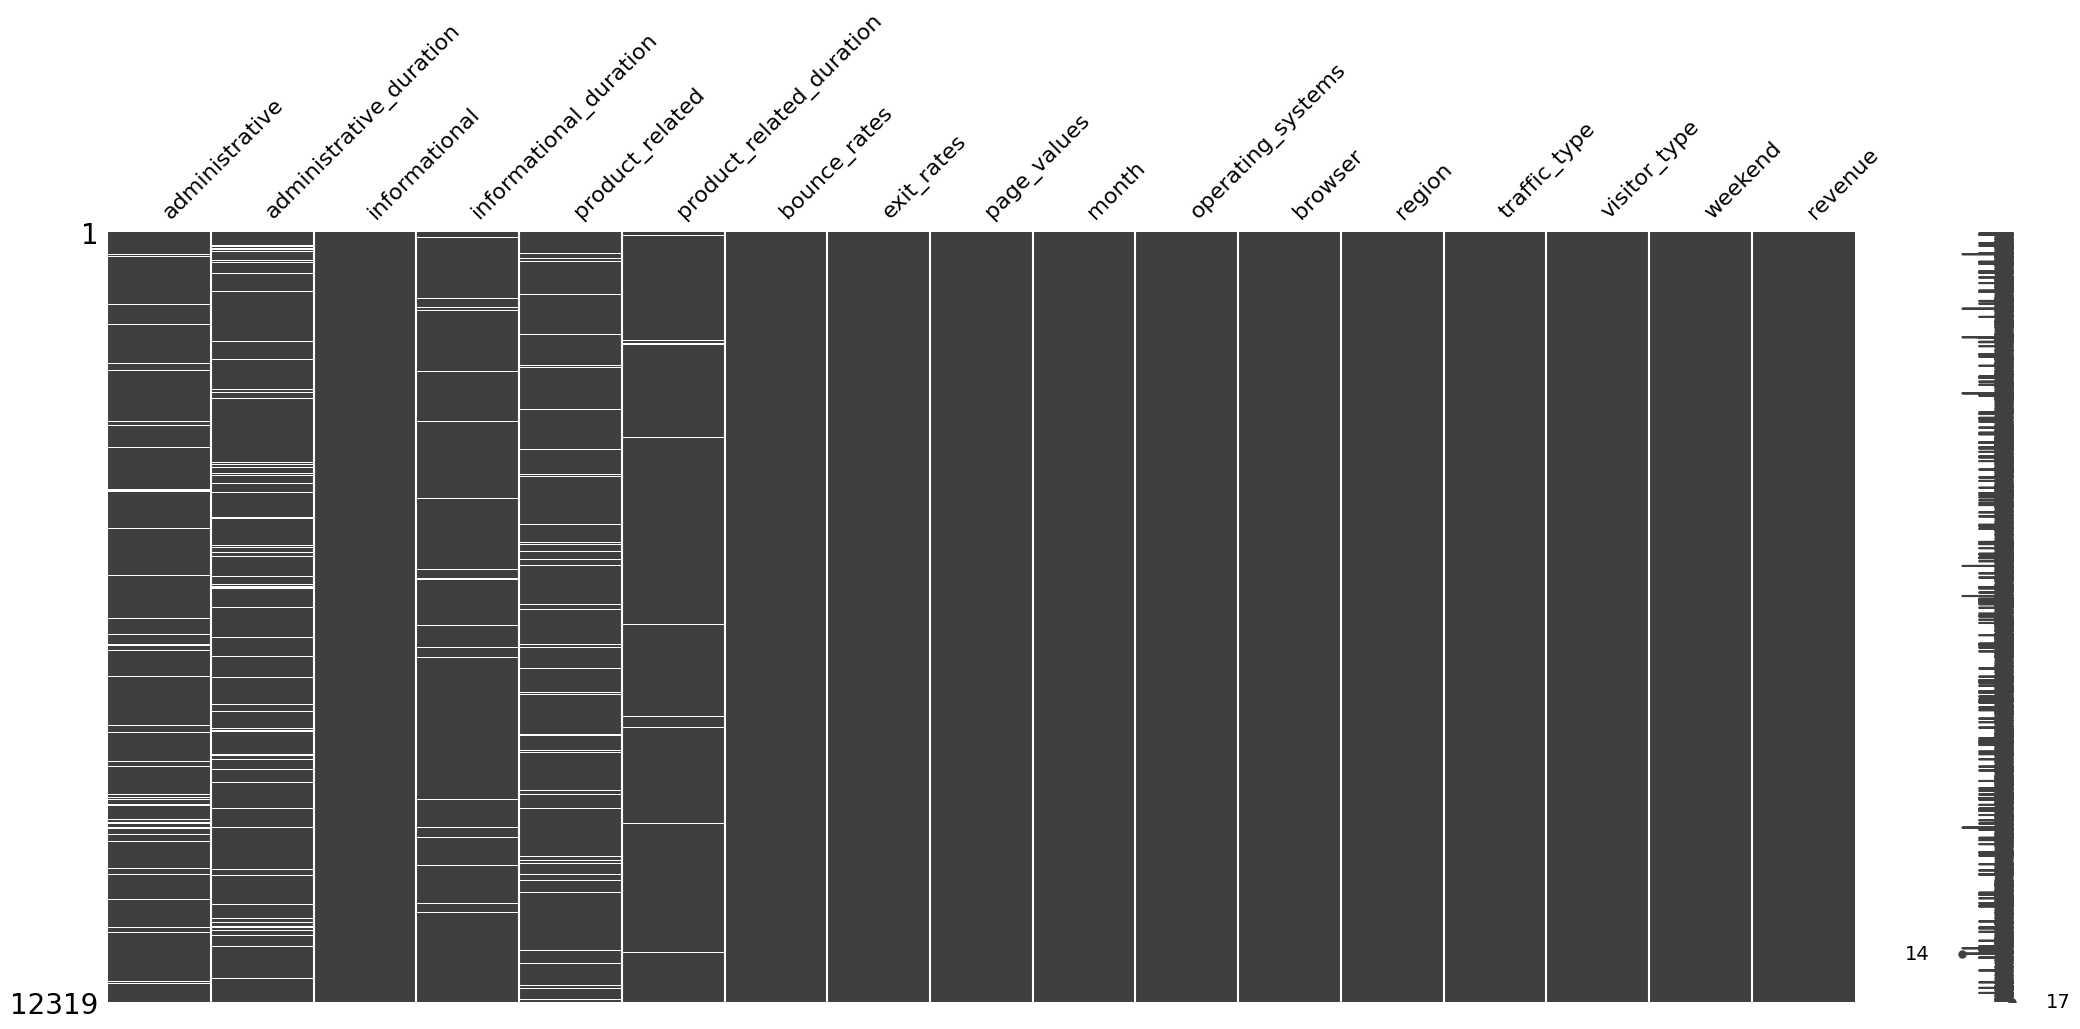

In [250]:
msno.matrix(ca_data_cleaned)

We can see from this that the null values don't appear on the same rows on the different columns, and if none are acctually on the same rows, deleting all the null value rows would amount to loosing almost 21% of our data. Our business questions also revolve around the columns that are affected by nulls, such as the duration and tasks done on the informational, administrative and product columns. Since dropping all those nulls would amount to losing a large part of our data, we now need to see which method would better fit for inputting the missing values.


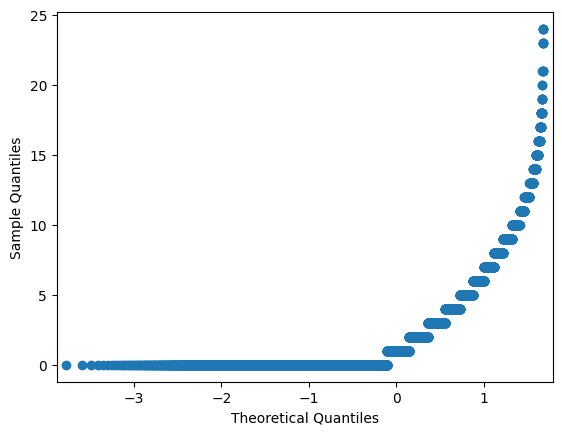

In [251]:
qq_plot = qqplot(ca_data_cleaned['administrative'] ,line='s')
pyplot.show()

Skew of administrative column is 1.9311017277526048
Kurtosis of administrative column is 4.26139319859128


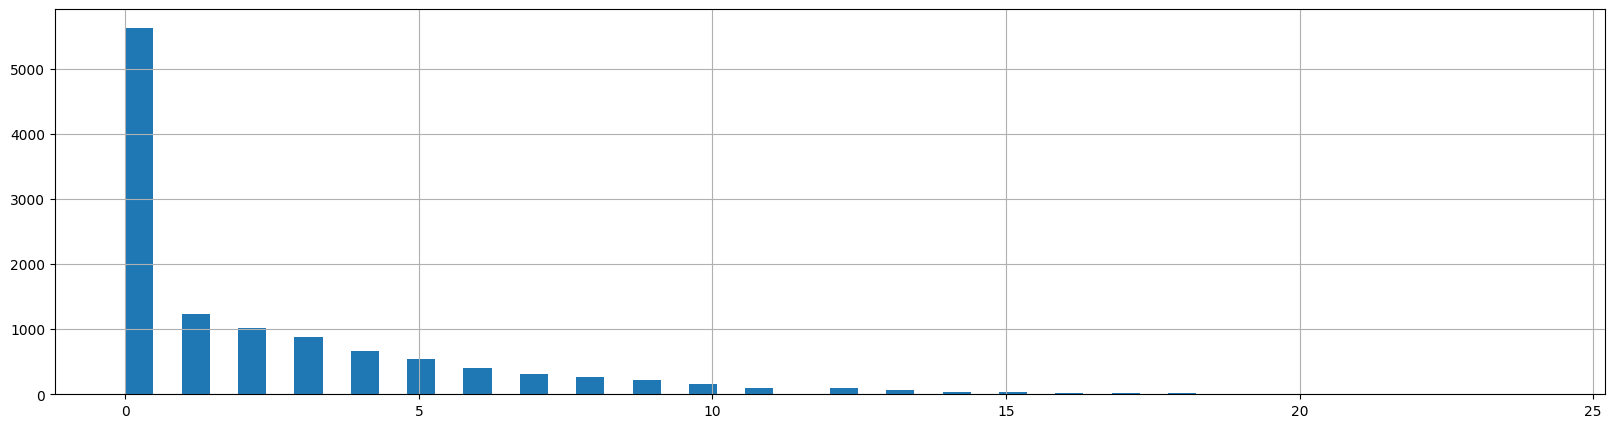

In [252]:
ca_data_cleaned['administrative'].hist(bins=50, figsize=(20,5))
print(f"Skew of administrative column is {ca_data_cleaned['administrative'].skew()}")
print(f"Kurtosis of administrative column is {ca_data_cleaned['administrative'].kurtosis()}")

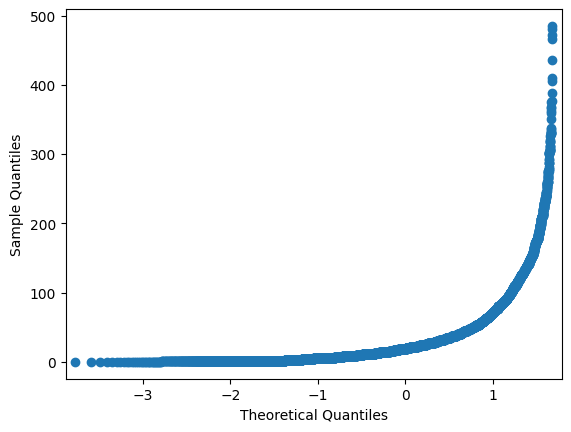

In [253]:
qq_plot = qqplot(ca_data_cleaned['product_related'], line='s')
pyplot.show()

Skew of product_related column is 3.321357847584352
Kurtosis of product_related column is 15.487614735676411


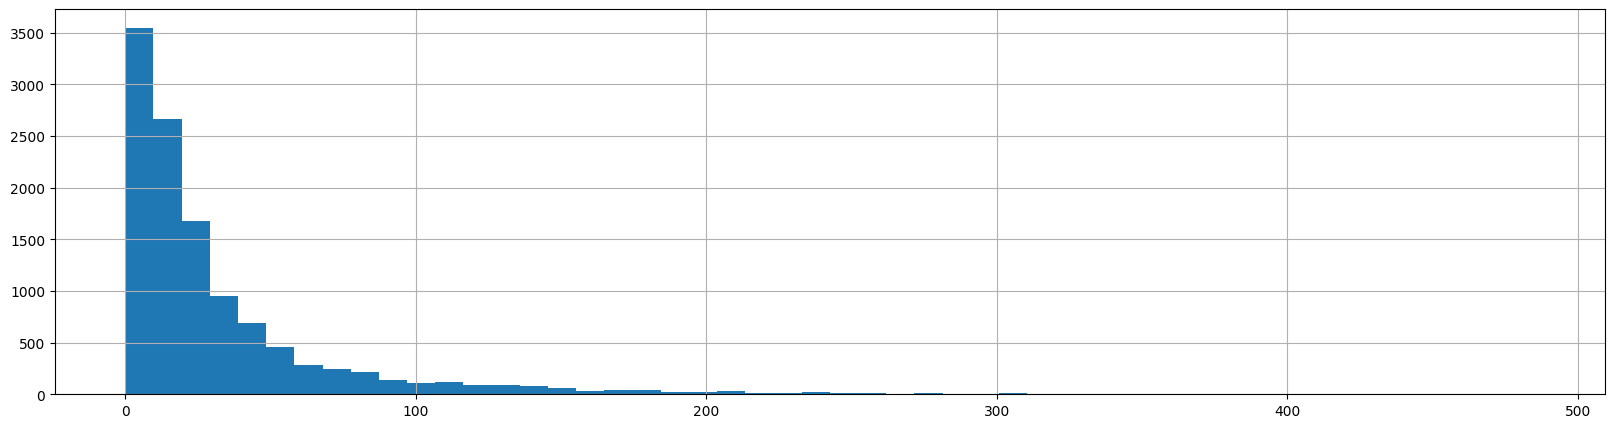

In [254]:
ca_data_cleaned['product_related'].hist(bins=50, figsize=(20,5))
print(f"Skew of product_related column is {ca_data_cleaned['product_related'].skew()}")
print(f"Kurtosis of product_related column is {ca_data_cleaned['product_related'].kurtosis()}")

First starting with the "categorical columns" (as in, even thou it's a number, it signifies a category of 1 number corresponds to 1 page), where assuming that null are MCAR, as there's no relation with other nulls, and being a simple log from internet input, there also shouldn't be any observer bias.
Both are right skewed, with significanttly higher value count to the left. we'll be then replacing them for the mode.

In [255]:
transformer = DataFrameTransform(ca_data_cleaned)
ca_data_cleaned = transformer.impute_nulls_with_mode(["administrative"])
ca_data_cleaned = transformer.impute_nulls_with_mode(["product_related"])

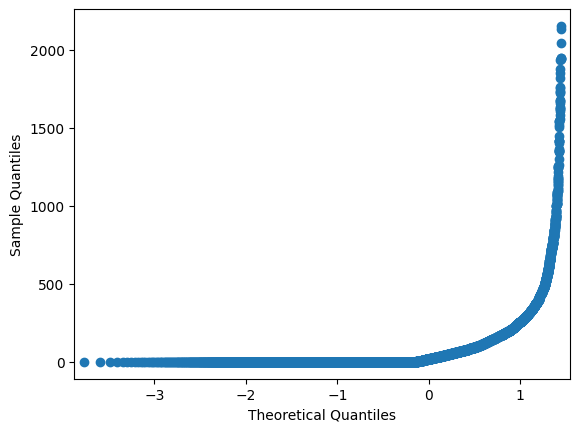

In [256]:
qq_plot = qqplot(ca_data_cleaned['administrative_duration'],line='s')
pyplot.show()

Skew of administrative_duration column is 4.666026221097623
Kurtosis of administrative_duration column is 30.905794680991267


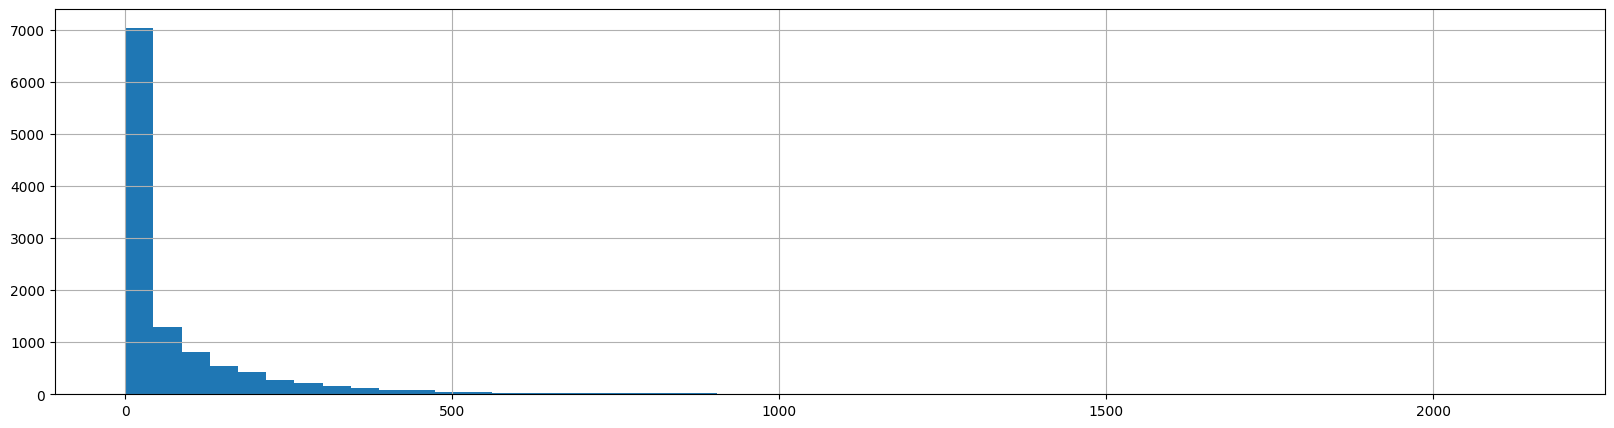

In [257]:
ca_data_cleaned['administrative_duration'].hist(bins=50, figsize=(20,5))
print(f"Skew of administrative_duration column is {ca_data_cleaned['administrative_duration'].skew()}")
print(f"Kurtosis of administrative_duration column is {ca_data_cleaned['administrative_duration'].kurtosis()}")

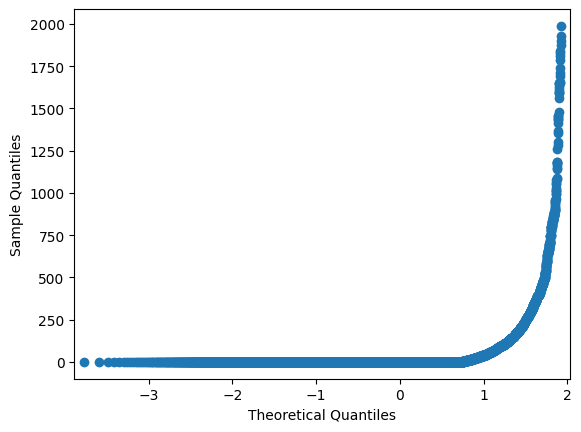

In [258]:
qq_plot = qqplot(ca_data_cleaned['informational_duration'],line='s')
pyplot.show()

Skew of informational_duration column is 7.208093359346399
Kurtosis of informational_duration column is 67.04505804832914


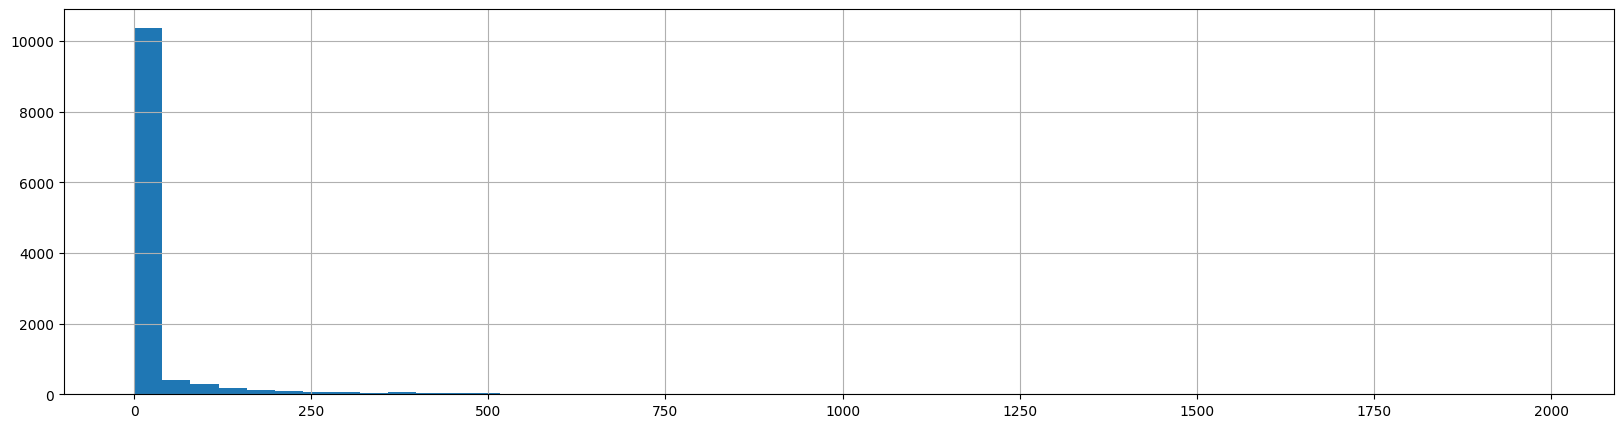

In [259]:
ca_data_cleaned['informational_duration'].hist(bins=50, figsize=(20,5))
print(f"Skew of informational_duration column is {ca_data_cleaned['informational_duration'].skew()}")
print(f"Kurtosis of informational_duration column is {ca_data_cleaned['informational_duration'].kurtosis()}")

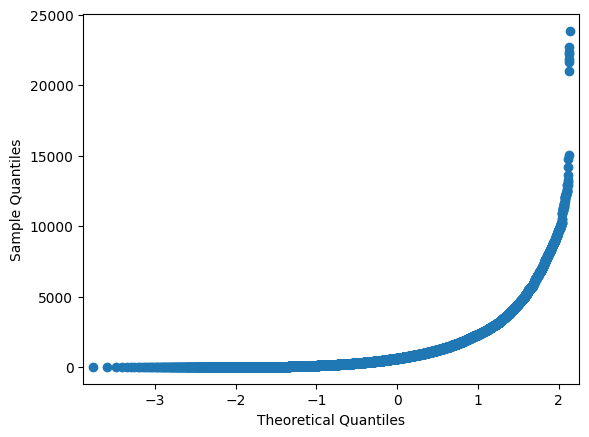

In [260]:
qq_plot = qqplot(ca_data_cleaned['product_related_duration'],line='s')
pyplot.show()

Skew of product_related_duration column is 3.643882703043871
Kurtosis of product_related_duration column is 21.25582115005234


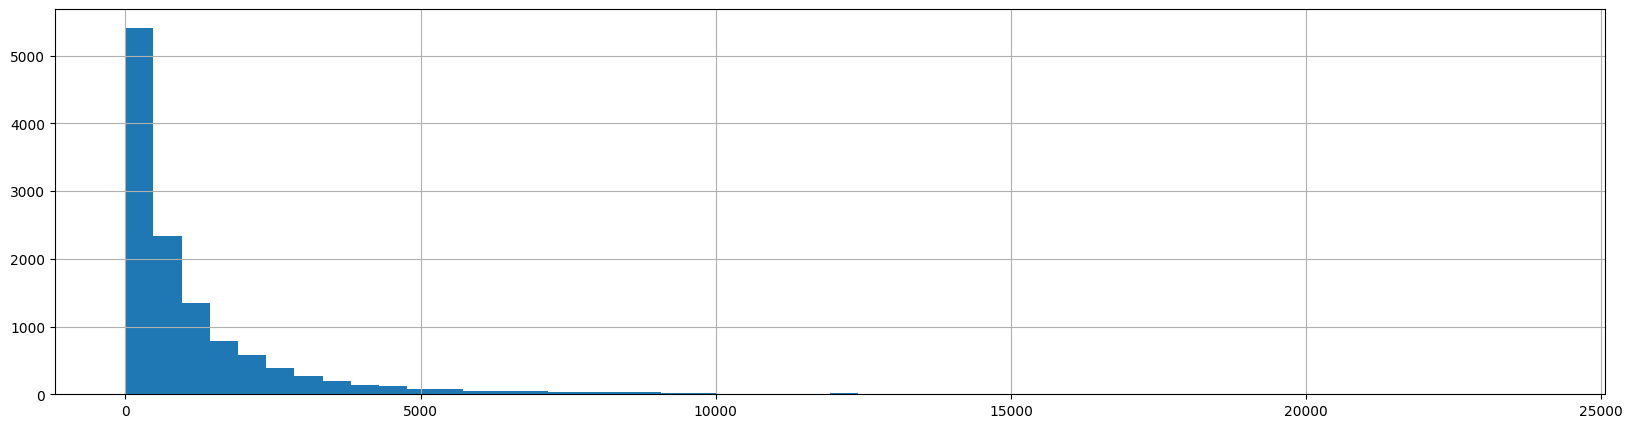

In [261]:
ca_data_cleaned['product_related_duration'].hist(bins=50, figsize=(20,5))
print(f"Skew of product_related_duration column is {ca_data_cleaned['product_related_duration'].skew()}")
print(f"Kurtosis of product_related_duration column is {ca_data_cleaned['product_related_duration'].kurtosis()}")

With the continuous values columns, we can see there's a right skew and significant kurtosis. We can then replace the null values with the median

In [262]:

ca_data_cleaned = transformer.impute_nulls_with_median(["administrative_duration"])
ca_data_cleaned = transformer.impute_nulls_with_median(['informational_duration'])
ca_data_cleaned = transformer.impute_nulls_with_median(['product_related_duration'])

We can now confirm that we replaced all null values by calling the null count and comparing the nulls of the original with the cleaned df. We can also compare the data entries to see if we lost the 11 nulls dropped from operating_systems

In [263]:
DataFrameInfo.null_counts(ca_data_cleaned)

NULL COUNT
administrative              0
administrative_duration     0
informational               0
informational_duration      0
product_related             0
product_related_duration    0
bounce_rates                0
exit_rates                  0
page_values                 0
month                       0
operating_systems           0
browser                     0
region                      0
traffic_type                0
visitor_type                0
weekend                     0
revenue                     0
dtype: int64


visualization comparison of missing data from original data to now cleaned data

original null values

<Axes: >

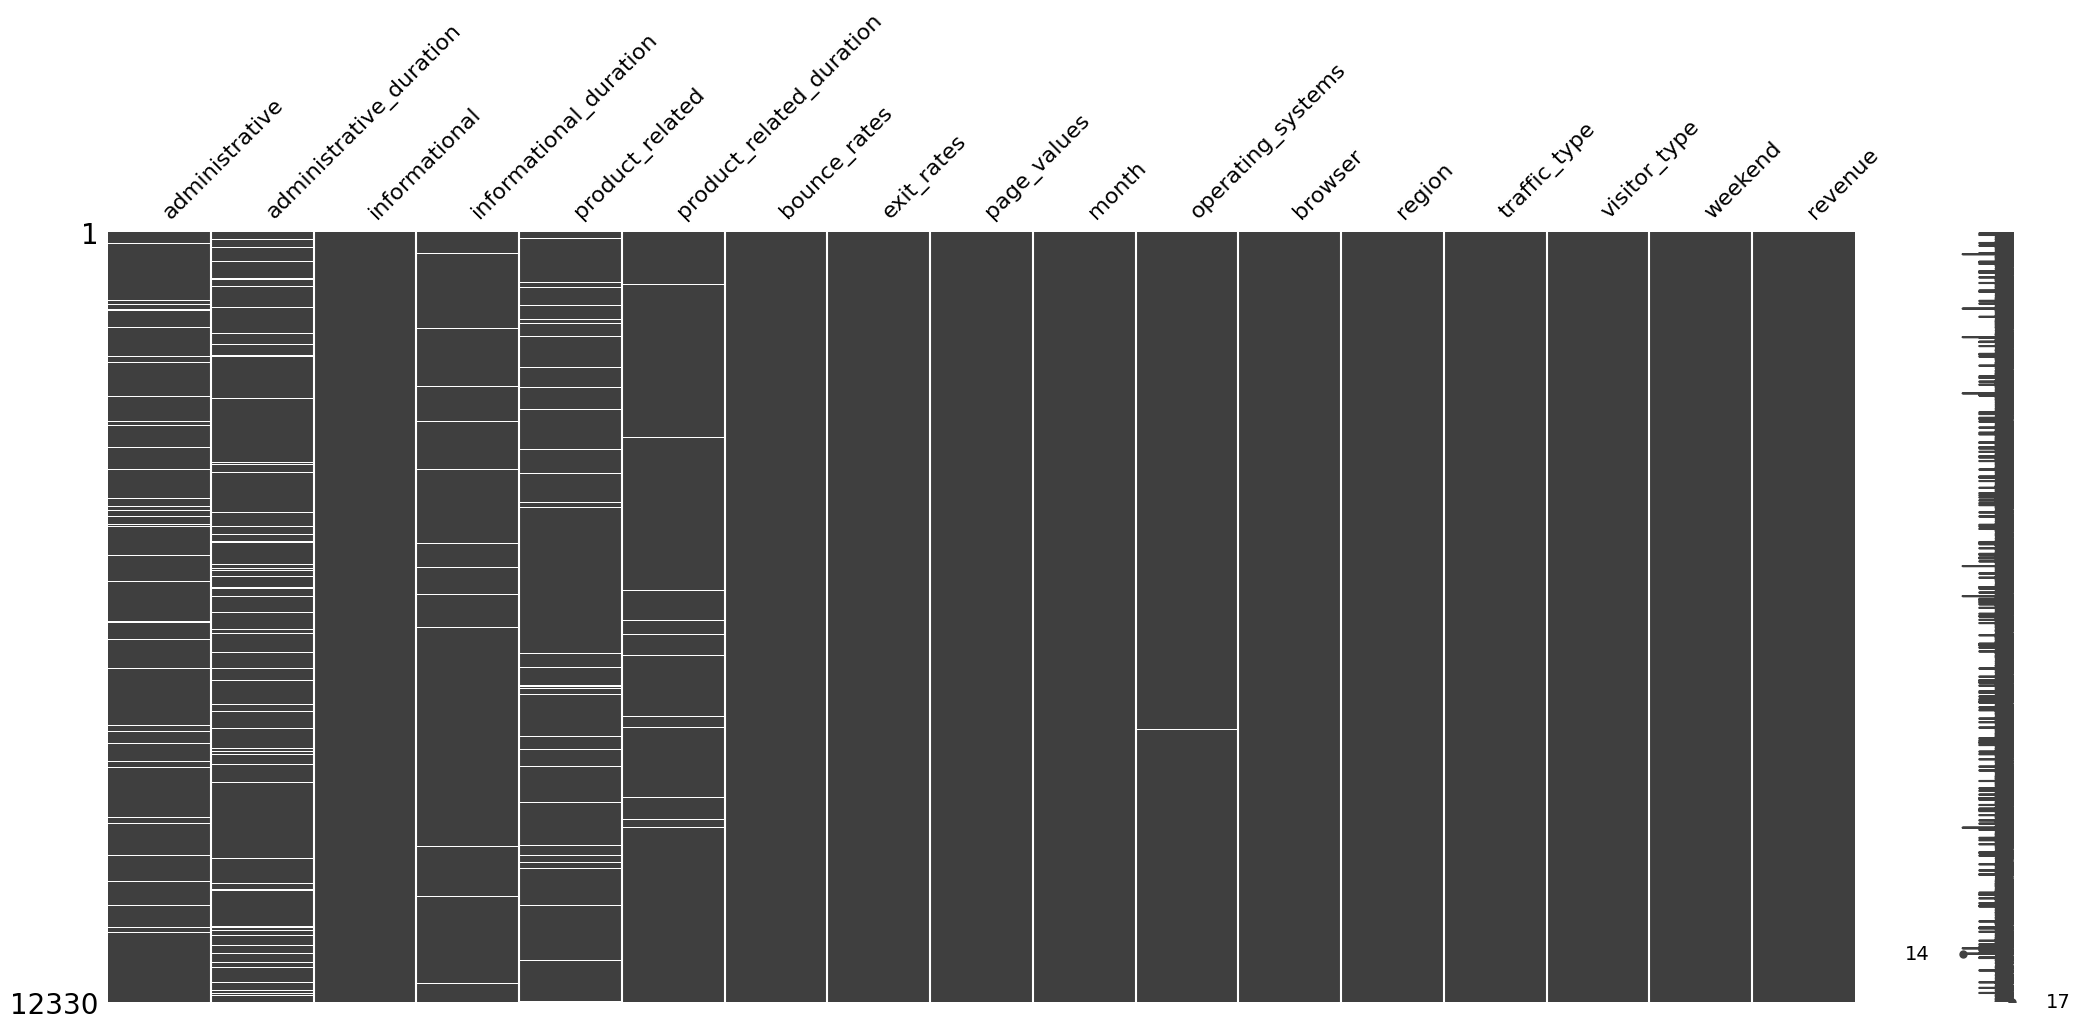

In [264]:
msno.matrix(customer_activity_df)

cleaned null values

<Axes: >

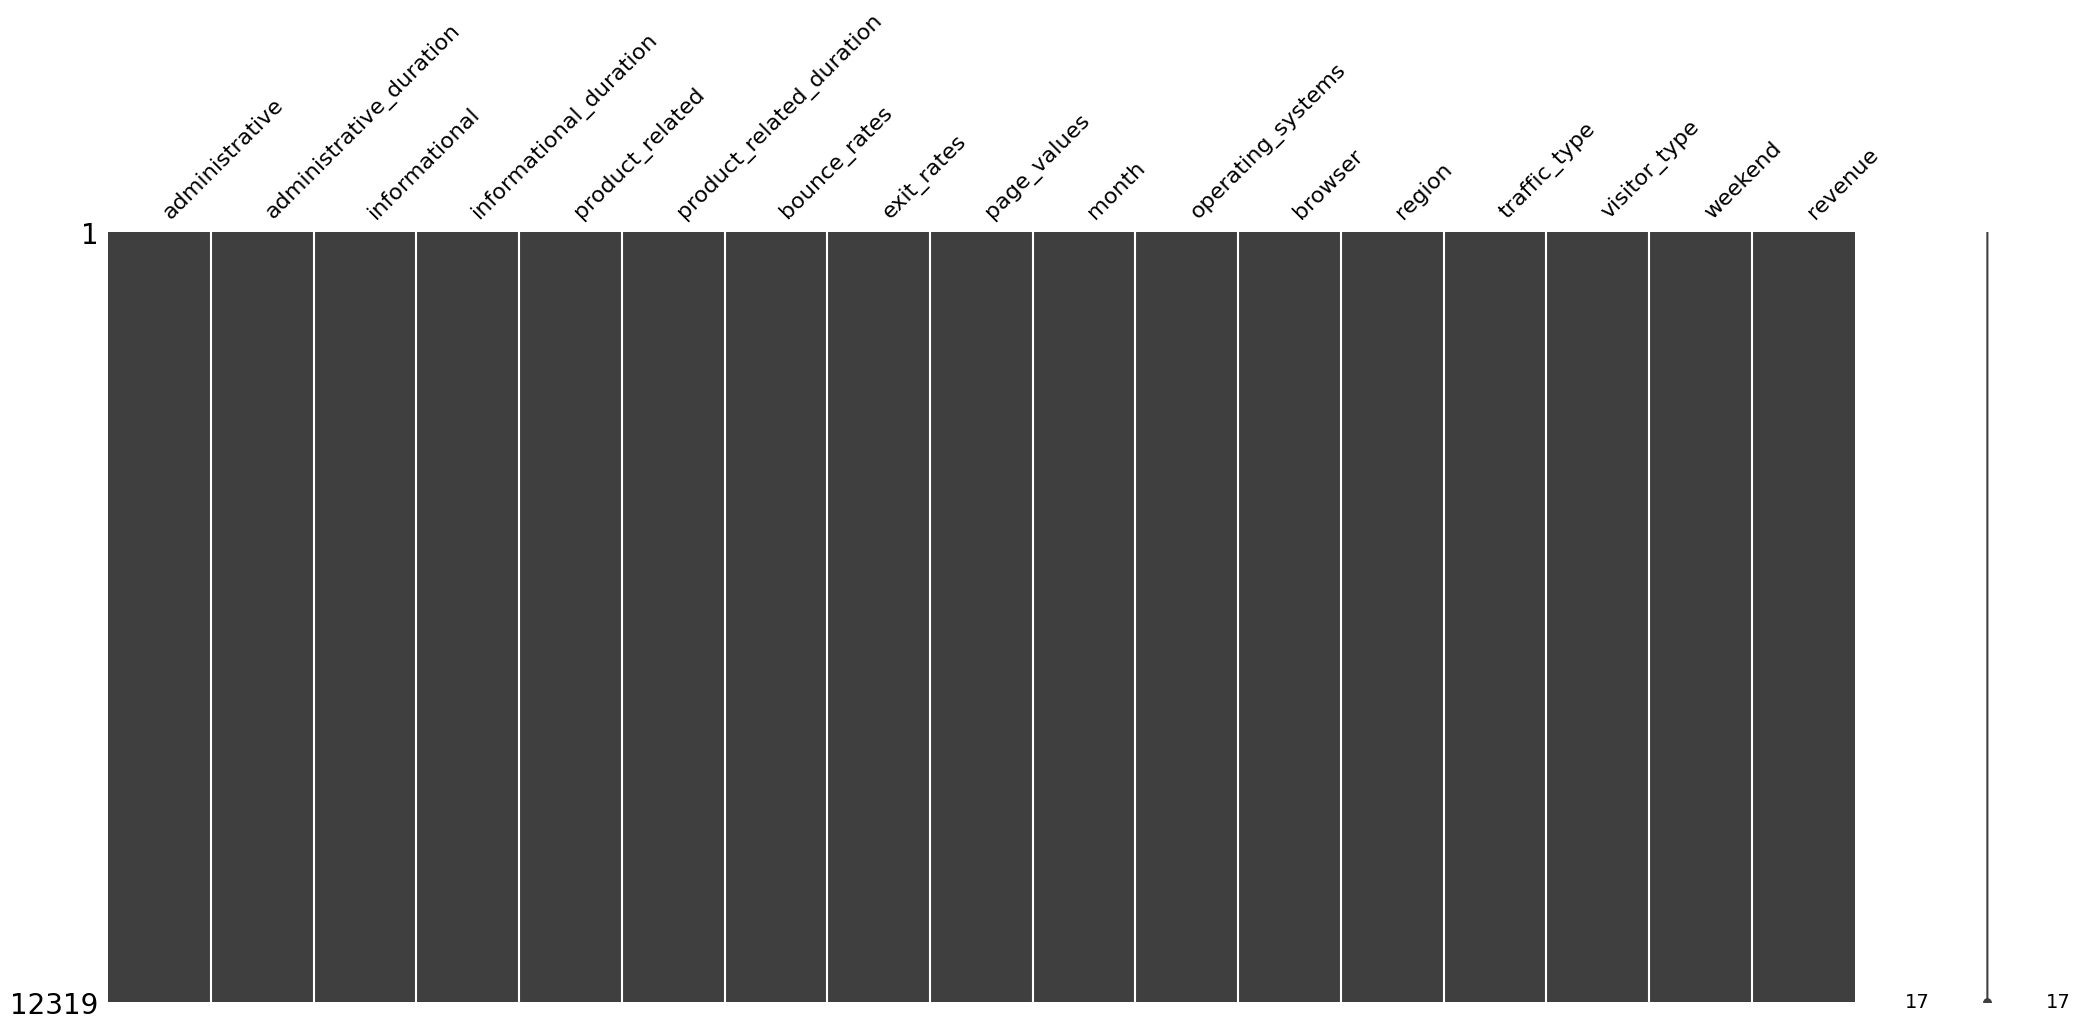

In [265]:
msno.matrix(ca_data_cleaned)

Lastly, comparing the skew values of the df having null values input compared to origional df to confirm that we chosen the right method to deal with null values and haven't introduced a major variation to the data

In [266]:
null_columns = ['administrative', 'administrative_duration', 'informational_duration', 'product_related', 'product_related_duration']
print(f"Skew of columns is :{ca_data_cleaned[null_columns].skew()}")
print(f"Skew of columns is :{customer_activity_df[null_columns].skew(skipna=True)}")

Skew of columns is :administrative              1.995463
administrative_duration     4.841062
informational_duration      7.309835
product_related             3.367749
product_related_duration    3.679656
dtype: float64
Skew of columns is :administrative              1.930426
administrative_duration     4.666608
informational_duration      7.202650
product_related             3.321367
product_related_duration    3.643645
dtype: float64


As we've removed all nulls, we can now transform administrative and product_related columns to int, as if done previously, could introduce errors on null values.

In [267]:
ca_data_cleaned = transformer.convert_columns(['administrative','product_related'], 'int')
ca_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12319 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12319 non-null  int64  
 1   administrative_duration   12319 non-null  float64
 2   informational             12319 non-null  int64  
 3   informational_duration    12319 non-null  float64
 4   product_related           12319 non-null  int64  
 5   product_related_duration  12319 non-null  float64
 6   bounce_rates              12319 non-null  float64
 7   exit_rates                12319 non-null  float64
 8   page_values               12319 non-null  float64
 9   month                     12319 non-null  int64  
 10  operating_systems         12319 non-null  object 
 11  browser                   12319 non-null  object 
 12  region                    12319 non-null  object 
 13  traffic_type              12319 non-null  object 
 14  visitor_typ

Milestone 3.4 - skewed data. As seen above, some of the data is skewed, and now needs transformation to reduce the skew.
we're first checking the new statistics results within the cleaned data

In [268]:
ca_data_cleaned.describe(percentiles= [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .98, .99]), 
# DataFrameInfo.statistics_info(ca_data_cleaned)

(       administrative  administrative_duration  informational  \
 count    12319.000000             12319.000000   12319.000000   
 mean         2.201964                78.750090       0.497037   
 std          3.321535               173.900476       1.174416   
 min          0.000000                 0.000000       0.000000   
 10%          0.000000                 0.000000       0.000000   
 20%          0.000000                 0.000000       0.000000   
 30%          0.000000                 0.000000       0.000000   
 40%          0.000000                 0.000000       0.000000   
 50%          0.000000                 6.000000       0.000000   
 60%          1.000000                27.380000       0.000000   
 70%          3.000000                63.980000       0.000000   
 80%          4.000000               116.085311       1.000000   
 90%          7.000000               223.868333       2.000000   
 95%          9.000000               356.943946       3.000000   
 98%      

In [269]:
float_columns = ['administrative_duration',
                'informational_duration',
                'product_related_duration',
                'bounce_rates',
                'exit_rates',
                'page_values']
print(f"Skew of columns is :{ca_data_cleaned[float_columns].skew()}")

Skew of columns is :administrative_duration     4.841062
informational_duration      7.309835
product_related_duration    3.679656
bounce_rates                2.949403
exit_rates                  2.194274
page_values                 6.031533
dtype: float64


We can see from the skew values that page_values and informational_duration are the most skewed one, and gathering info from the describe(), we can see that having 0 represent values up to the 75% percentil, that it is a very positive skew.
Now visualizing and counting the values of each will allows to bettter grasps the distribution

In [270]:
print(ca_data_cleaned['page_values'].value_counts())
print(ca_data_cleaned['informational_duration'].value_counts())
print(ca_data_cleaned['administrative_duration'].value_counts())
print(ca_data_cleaned['product_related_duration'].value_counts())
print(ca_data_cleaned['bounce_rates'].value_counts())
print(ca_data_cleaned['exit_rates'].value_counts())

page_values
0.0      9540
3.3        25
2.5        21
5.5        19
10.1       19
         ... 
76.5        1
112.3       1
62.6        1
34.4        1
73.1        1
Name: count, Length: 741, dtype: int64
informational_duration
0.000000       9848
6.000000         39
17.000000        30
13.000000        28
7.000000         26
               ... 
250.600000        1
1167.600000       1
365.800000        1
139.800000        1
395.333333        1
Name: count, Length: 1279, dtype: int64
administrative_duration
0.000000      5506
6.000000       949
5.000000        51
7.000000        44
4.000000        43
              ... 
342.066667       1
171.250000       1
247.500000       1
133.083333       1
171.200000       1
Name: count, Length: 3354, dtype: int64
product_related_duration
0.0       746
586.0     207
34.0       23
66.0       23
12.0       22
         ... 
4441.0      1
4868.0      1
4724.0      1
3387.0      1
3704.0      1
Name: count, Length: 3494, dtype: int64
bounce_rates
0.0000 

informational_duration graph

<Axes: >

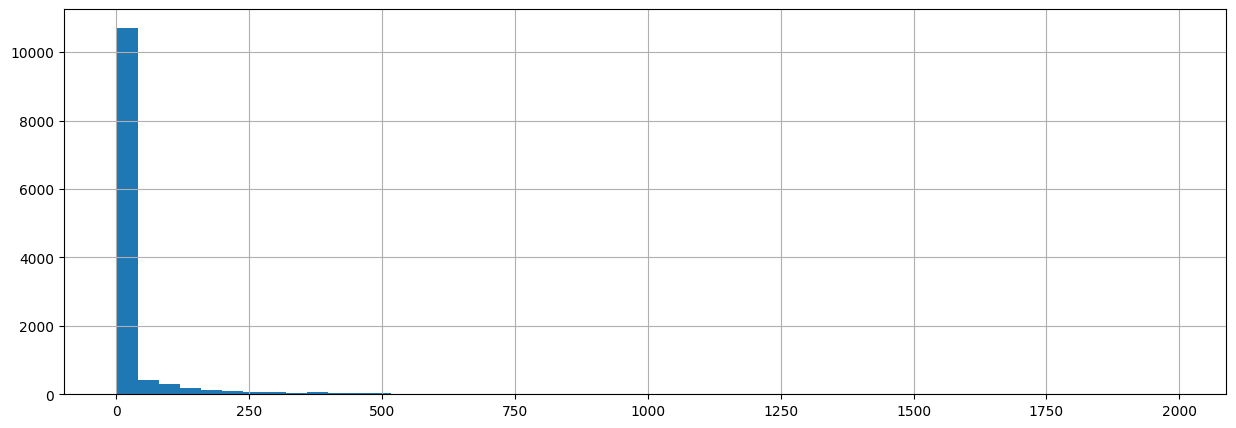

In [271]:
ca_data_cleaned['informational_duration'].hist(bins=50, figsize=(15,5))

page_values graph

<Axes: >

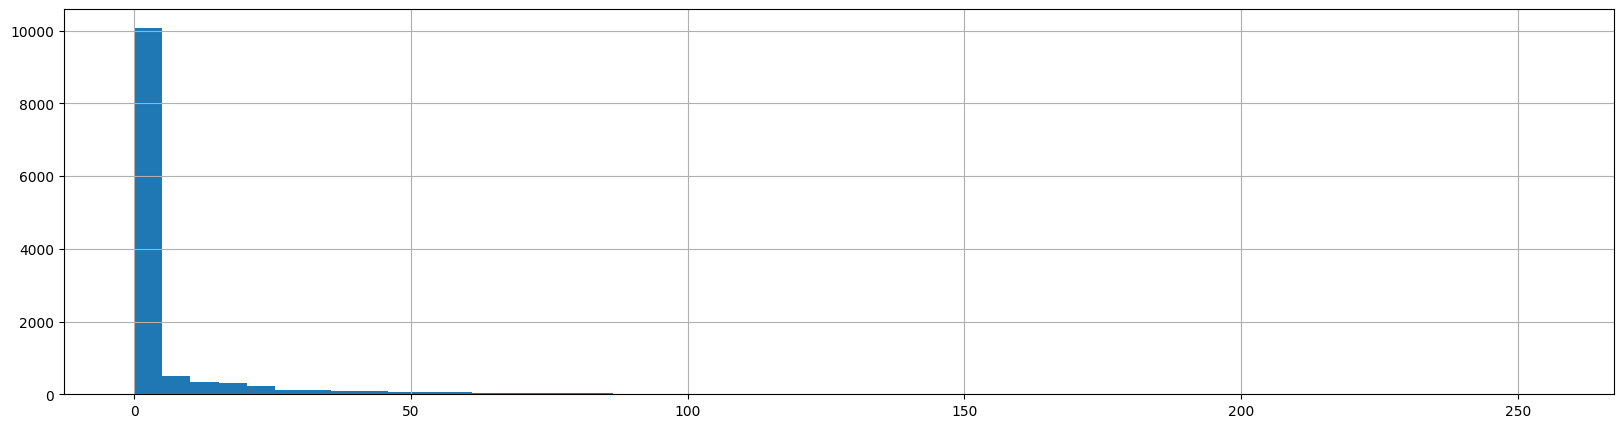

In [272]:
ca_data_cleaned['page_values'].hist(bins=50, figsize=(20,5))

There's an overwheelming amount of 0 when compared to all others in some columns, which is mostly explained by 0 representing that the task wasn't done on the first place. The spike on 0.200 on informational_duration is likely due to being the maximum duration for the records, an any passing that will fall into that value.

<Axes: >

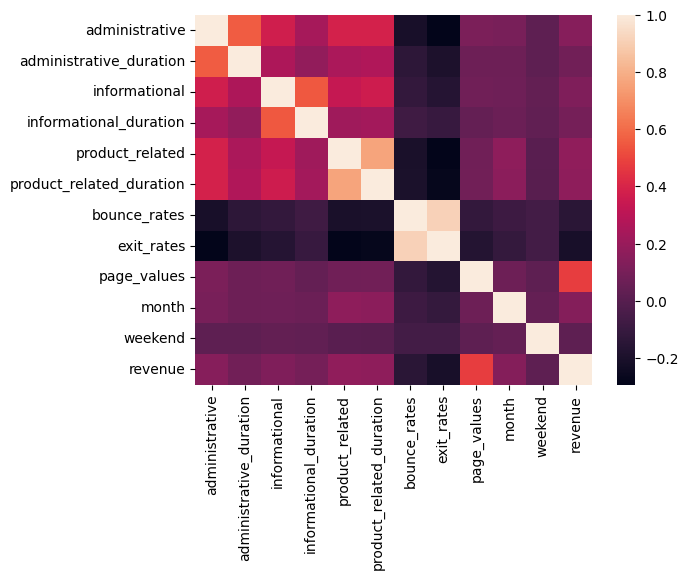

In [273]:

numerical_columns = ['administrative',
                     'administrative_duration',
                     'informational',
                     'informational_duration',
                     'product_related',
                     'product_related_duration',
                     'bounce_rates',
                     'exit_rates',
                     'page_values',
                     'month',
                     'weekend',
                     'revenue'
                     ]

sns.heatmap(ca_data_cleaned[numerical_columns].corr())

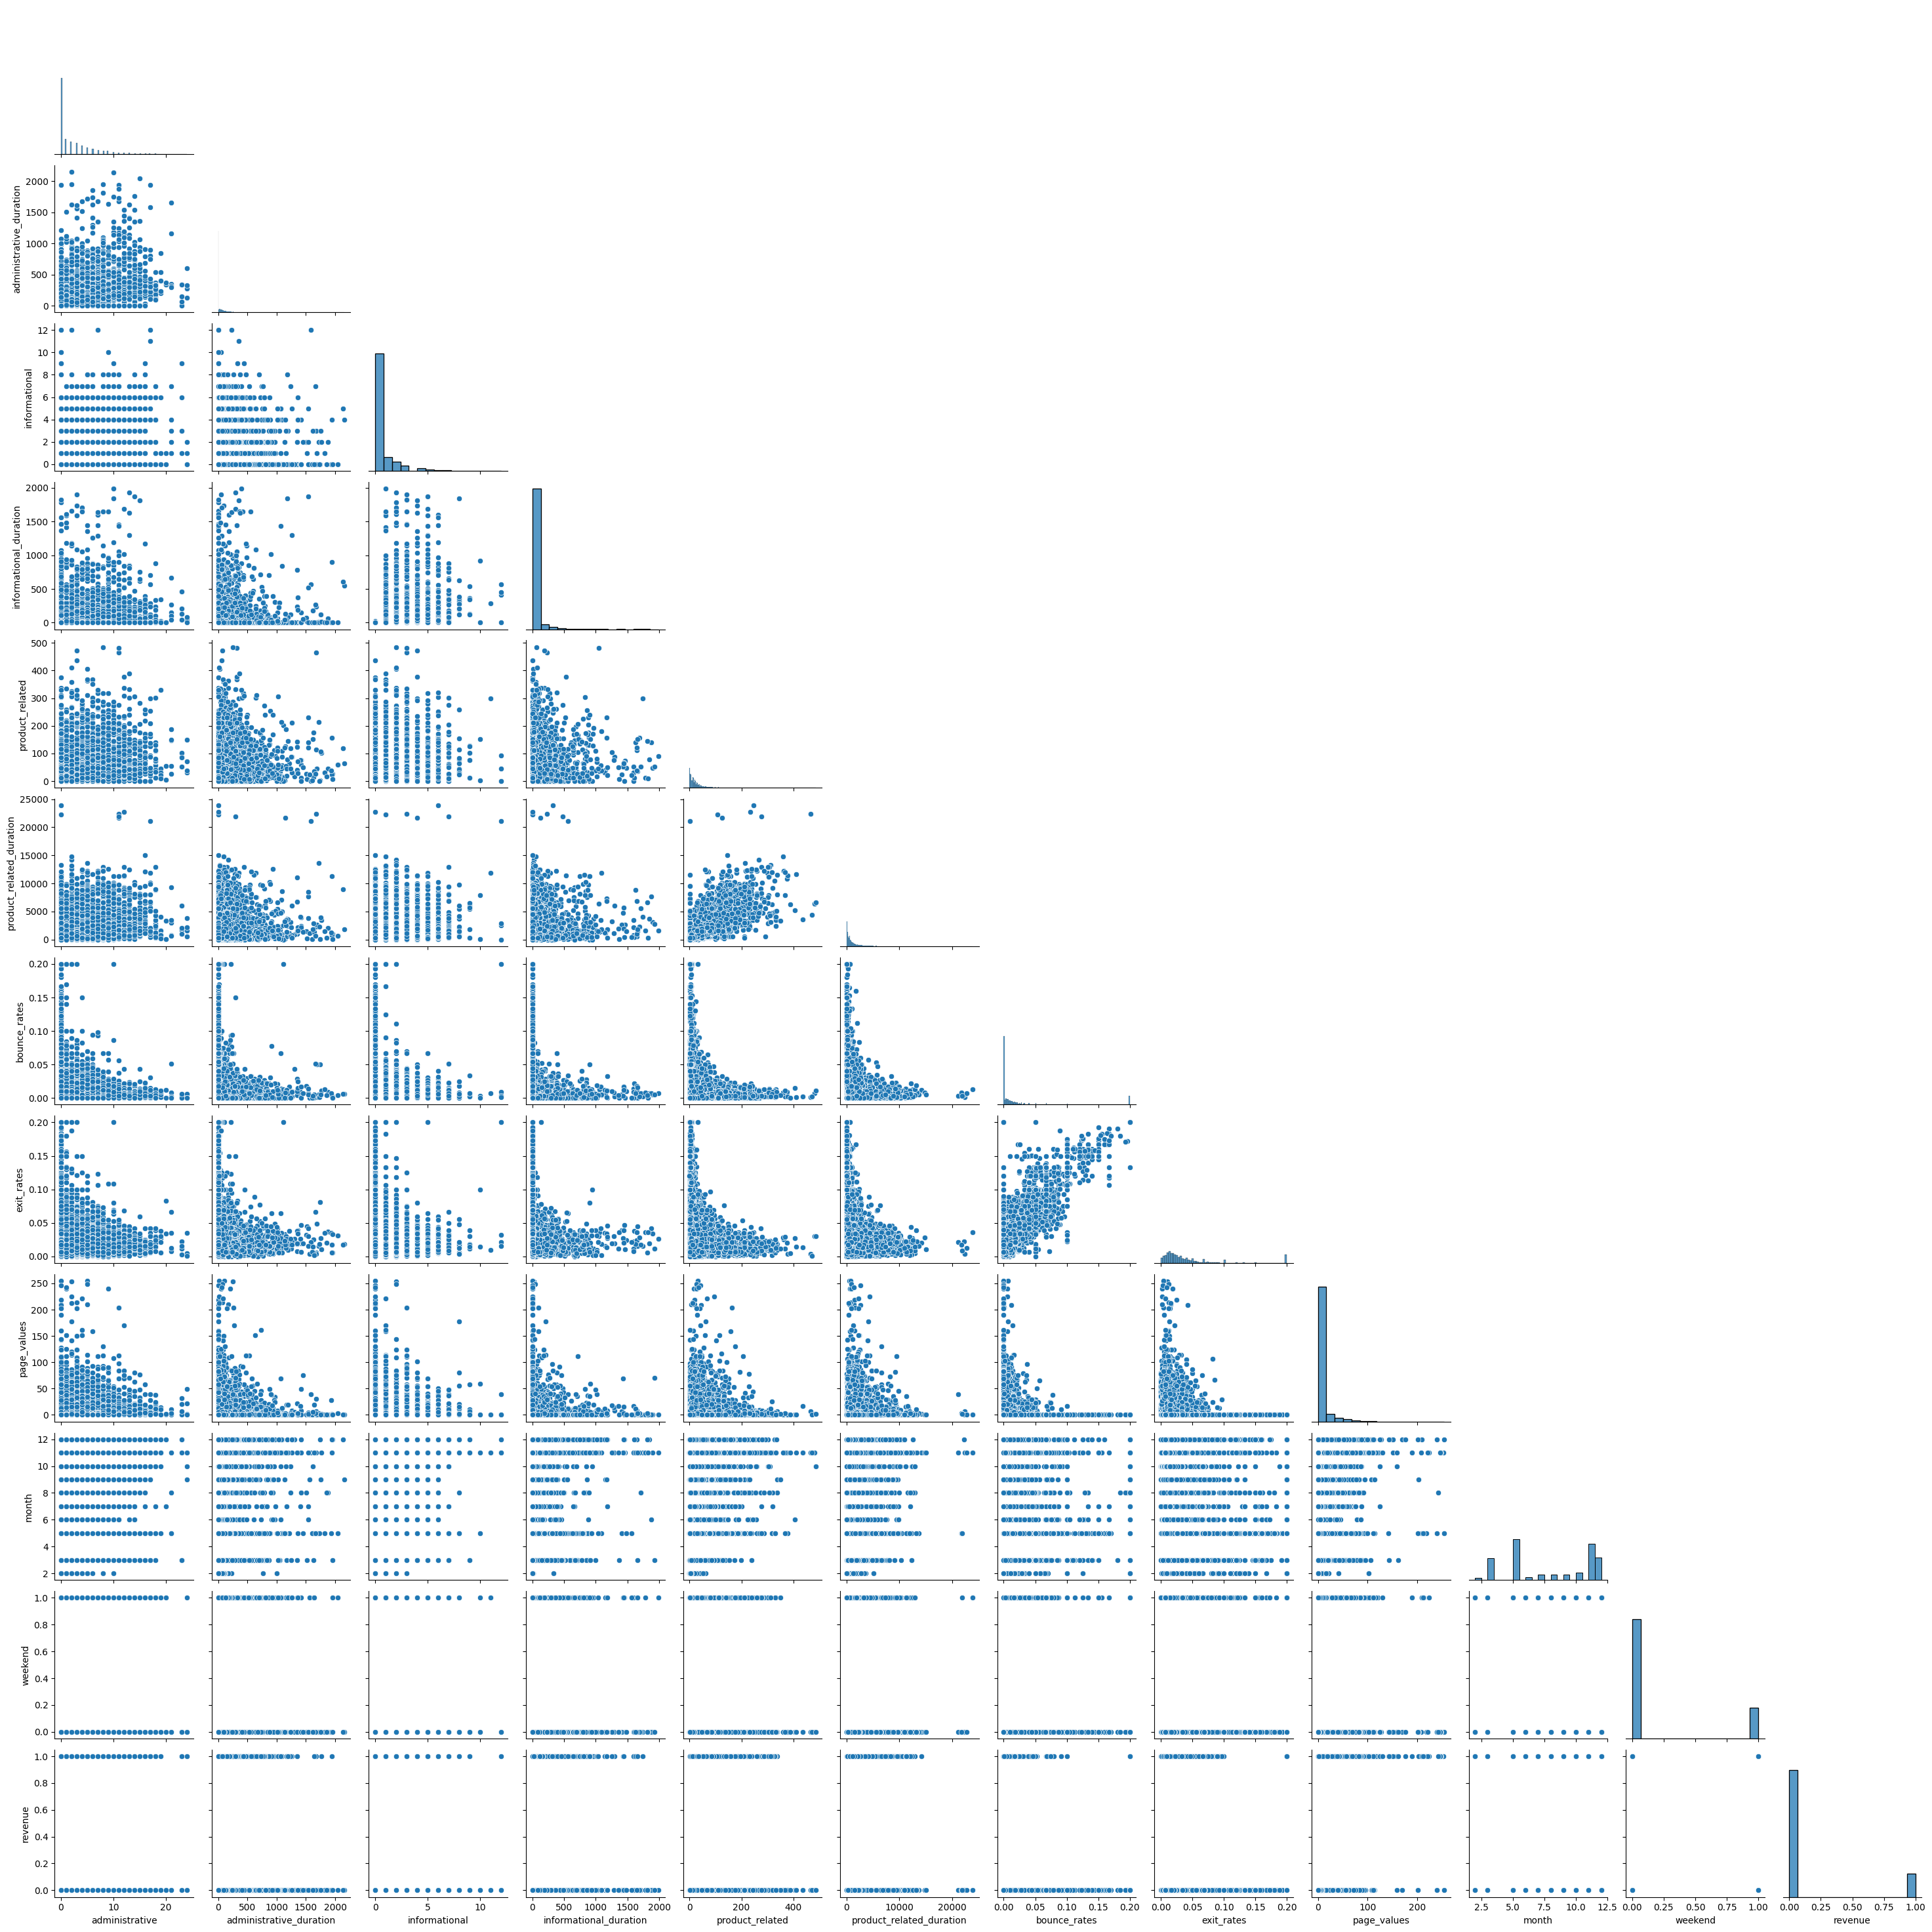

In [274]:
sns.pairplot(ca_data_cleaned, corner=True)

It seems that exit_rates and bounce_rates have a positive correlation, likely due to long times, which are on both maximum 0.2, being all agregated on the same value, and 0 which may connection issues meaning the page not loading leading to either bounce or the user closing it by itself. There also seems to be some correlation between the product with product_duration of them, which could just mean that the different products will need different amounts of time to be done, some products may have more choices to make or needing more contemplation from the customer, either due to price or amount of information on the product page.

We've already seen the graph and qq plots of administrative_duration, informational_duration and product related duration back on the null values input. Remaining page_values, exit_rates and bounce_rates

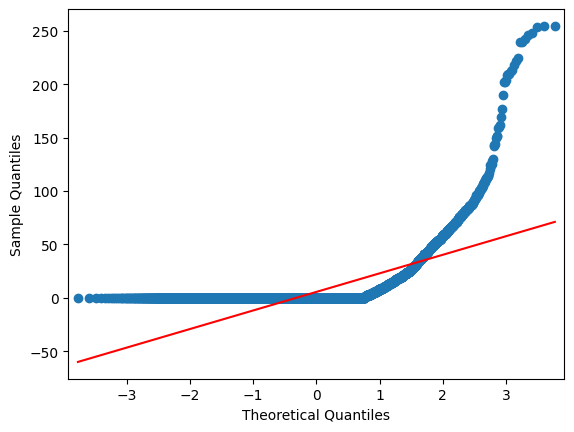

In [275]:
qq_plot = qqplot(ca_data_cleaned['page_values'],line='s')
pyplot.show()

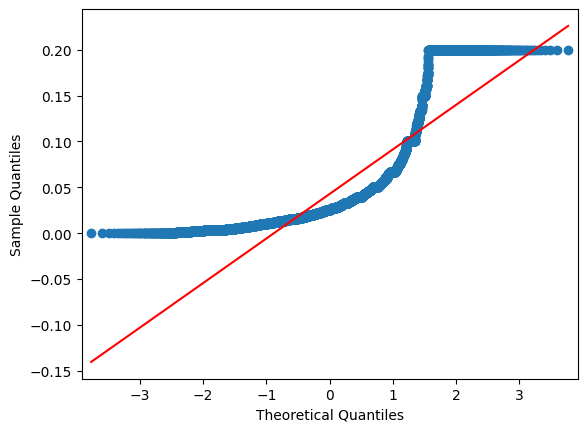

In [276]:
qq_plot = qqplot(ca_data_cleaned['exit_rates'],line='s')
pyplot.show()

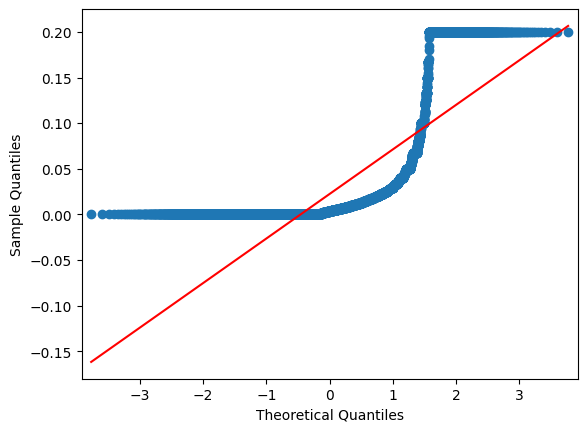

In [277]:
qq_plot = qqplot(ca_data_cleaned['bounce_rates'],line='s')
pyplot.show()

We'll try to correct the skew by using log transform on the duration columns, as there's a strong right skew without an upper limit, with significant outliers, likely due to the customer forgetting to close the page.
we'll use yeo johnson transform for bounce_rates, exit_rates and page_values, as the first 2 have a ceiling and page values, even thou without a ceiling, doesn't have significant outliers such as the duration columns.

In [278]:
transformer = DataFrameTransform(ca_data_cleaned)
ca_data_pre = transformer.log_transform(['administrative_duration','informational_duration', 'product_related_duration'])
ca_data_pre = transformer.yeo_johnson_transform(['bounce_rates', 'exit_rates', 'page_values'])

In [279]:
ca_data_pre.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .98])

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,weekend,revenue
count,12319.000000,12319.000000,12319.000000,12319.000000,12319.000000,12319.000000,12319.000000,12319.000000,12319.000000,12319.000000,12319.000000,12319.000000
mean,2.201964,2.258981,0.497037,0.846525,31.327868,5.965756,0.009007,0.021305,0.636157,7.729605,0.206348,0.154802
std,3.321535,2.302865,1.174416,1.807856,44.065720,2.030799,0.012143,0.011847,1.285744,3.388906,0.404700,0.361730
min,0.000000,-3.401197,0.000000,-1.609438,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,2.000000,3.663562,0.000000,0.006470,0.000000,3.000000,0.000000,0.000000
20%,0.000000,0.000000,0.000000,0.000000,5.000000,4.912655,0.000000,0.010501,0.000000,5.000000,0.000000,0.000000
30%,0.000000,0.000000,0.000000,0.000000,8.000000,5.549076,0.000000,0.013413,0.000000,5.000000,0.000000,0.000000
40%,0.000000,0.000000,0.000000,0.000000,12.000000,6.014204,0.000000,0.016703,0.000000,5.000000,0.000000,0.000000
50%,0.000000,1.791759,0.000000,0.000000,17.000000,6.373320,0.003347,0.019083,0.000000,8.000000,0.000000,0.000000
60%,1.000000,3.309812,0.000000,0.000000,23.000000,6.704414,0.006824,0.023251,0.000000,10.000000,0.000000,0.000000


In [280]:
print(f"Skew of columns is :{ca_data_pre[float_columns].skew()}")

Skew of columns is :administrative_duration     0.339429
informational_duration      1.907325
product_related_duration   -1.445870
bounce_rates                1.373928
exit_rates                  0.413381
page_values                 1.824521
dtype: float64


We've significantly reduced the skew on the data, and now we'll be looking at outliers

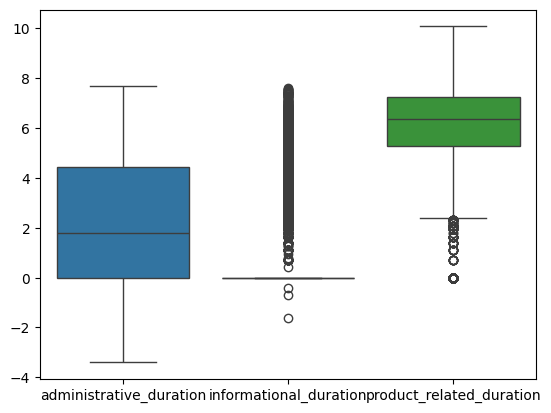

In [281]:
duration_columns = ['administrative_duration', 'informational_duration', 'product_related_duration']
Plotter.boxplot(ca_data_pre, duration_columns)

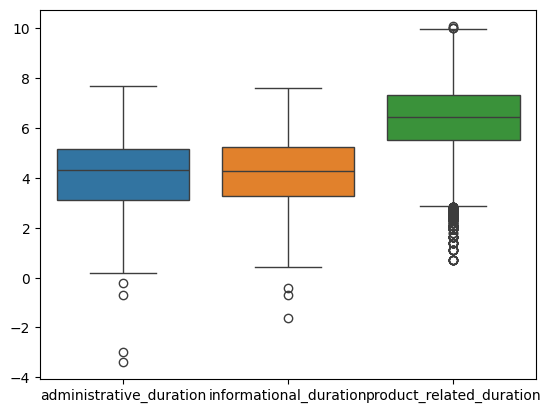

In [282]:
box_plot = ca_data_pre.replace(0, np.nan)
Plotter.boxplot(box_plot, duration_columns)


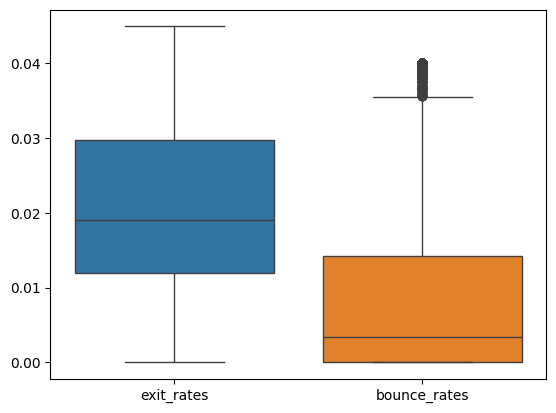

In [283]:
other_floats = ['exit_rates', 'bounce_rates']
Plotter.boxplot(ca_data_pre, other_floats)

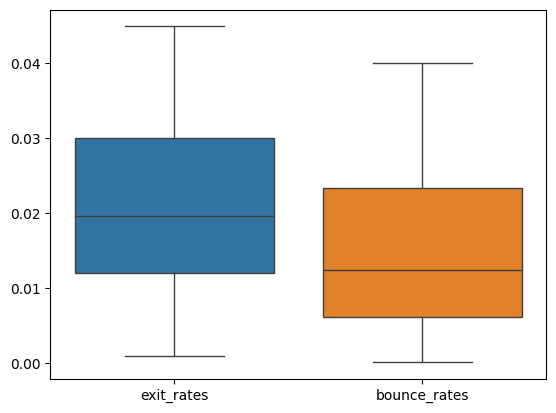

In [284]:
Plotter.boxplot(box_plot, other_floats)

As heavily populated with 0, skewing massively out IQR ranges, we've removed 0 to compare the outliers and only product_related_duration seems to now have several outliers but on the beggining of the scale. On pairplot above, there seems to be some leaning to zero on all duration columns when compared to bounce and exit rates, probably meaning that those would be either the wrong page, or especially on product, that upon opening the product, exited by not having the product corresponding to expectations. Without knowing further what the products entail and how long the process for processing the information on each page and the purchasing process, it's impossible to know if the times now in the IQR range with 0 removed are the normal to peruse and purchase or not.
Similarly, on bounce_rates, once 0 are removed, which once again, we assume means it didn't happened, there seems that outliers are much reduced.

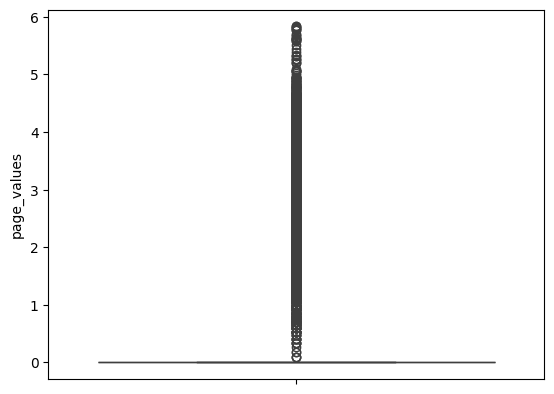

In [285]:
Plotter.boxplot(ca_data_pre, 'page_values')

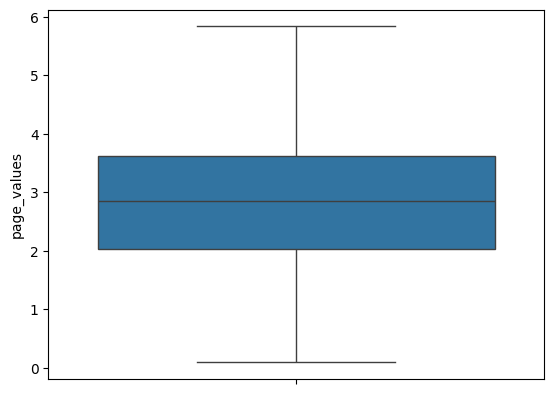

In [286]:
Plotter.boxplot(box_plot, 'page_values')

Finally, in happens the same on page_values, where removing 0 exposes a almost normal IQR. Without knowing if the product values do correspond to this range or not, it would be difficult to assess if any outliers at all are present.
WE'll not modify any for now, and depending on the business questions, it may or not need adaptation.

In [287]:
ca_data_pre.value_counts('operating_systems')

operating_systems
Windows     6596
MACOS       2676
Android     2584
iOS          385
ChromeOS      62
Ubuntu         9
Other          7
Name: count, dtype: int64

In [288]:
ca_data_pre.value_counts('browser')


browser
Google Chrome        7711
Safari               2526
Mozilla Firefox       830
Microsoft Edge        582
Internet Explorer     156
Samsung Internet      145
Opera                 136
Android               121
QQ                     53
Sogou Explorer         47
Yandex                  8
UC Browser              2
Undetermined            2
Name: count, dtype: int64

In [289]:
ca_data_pre.value_counts('region')

region
North America      4863
Western Europe     2282
Eastern Europe     1154
Asia               1140
South America       913
Africa              769
Northern Africa     499
Southern Africa     423
Oceania             276
Name: count, dtype: int64

In [290]:
ca_data_pre.value_counts('traffic_type')

traffic_type
Google search          3985
Facebook ads           2319
Instagram ads          2193
Bing search            1173
Youtube ads             642
Twitter                 474
Affiliate marketing     409
Youtube channel         401
Instagram Page          229
Direct Traffic          207
Tik Tok ads             142
Yahoo Search             43
Facebook page            30
Yandex search            21
Newsletter               16
Tik Tok page             13
DuckDuckGo search        10
Other                     6
Pinterest                 6
Name: count, dtype: int64

In [291]:
ca_data_pre.value_counts('visitor_type')

visitor_type
Returning_Visitor    10683
New_Visitor           1567
Other                   69
Name: count, dtype: int64

Within categorical/object columns, we can see that there's just a couple of categories which are very infrequent that might be called outliers, mostly falling into the other category. If needed, we'll dismiss those depending on need on the business analysis.

#TO DO - save file to csv to allow breaking here into another file just for the business analysis

Milestone 4.1 - Analysis and visualisation

    administrative: Columns which indicate which administrative activity the user was performing on their account
    administrative_duration: How long a user performed administrative tasks in that session
    informational: Indicates which informational activity the user was performing on the website
    informational_duration: How long a users performed informational tasks in seconds during that session
    product_related: Indicates which product the user was viewing on the website
    product_related_duration: How long a user browsed products during that session
    bounce_rates: Historical bounce rate of that particular page for all users (that visited the website and immediately exited)
    exit_rates: Historical exit rate of the users from that particular page.
    page_values: The average value contribution of a page to a customer sale
    month: The month the user's activity took place
    operating_systems: The operating system the user was using
    browser: The browser the user was using
    region: The region the user originated from
    traffic_type: How the user was redirected to the site
    visitor_type: Whether a customer was new, returning or other
    weekend: Whether the activity only took place during the weekend
    revenue: Whether the customer purchased anything during that session

    Manager questions
    - Are sales proportionally happening more on weekends?
    - Which regions are generating the most revenue currently?
    - Is there any particular website traffic that stands out when generating sales?
    - What percentage of time is spent on the website performing administrative/product or informational related tasks?
    - Are there any informational/administrative tasks which users spend time doing most?
    - What is the breakdown of months making the most sales?



ML 4.1, question 1 - Are sales proportionally happening more on weekends?

In [292]:
sales_weekends_df = ca_data_cleaned.iloc[:,15:]
weekend_effect = sales_weekends_df.groupby(['weekend']).sum()
total_sales = sales_weekends_df['revenue'].sum()
print(f"The total number os sales is {total_sales}")
weekend_effect['proportion_sales_percentage'] = (weekend_effect['revenue']/total_sales) * 100
weekend_effect.head()

The total number os sales is 1907


,revenue,proportion_sales_percentage
weekend,,
0,1476,77.399056
1,431,22.600944


In [293]:
ca_data_cleaned.groupby(['weekend', 'revenue'], as_index=False).size() # testing if it got the right results

,weekend,revenue,size
0,0,0,8301
1,0,1,1476
2,1,0,2111
3,1,1,431


In [294]:
weekend_sales = sales_weekends_df.groupby(['weekend']).sum()
per_day_week = weekend_sales['revenue']/5
per_day_weekend = weekend_sales['revenue']/2
print(f'revenue peer day of week is:{per_day_week.iloc[0]}')
print(f'revenue peer day of weekend is:{per_day_weekend.iloc[1]}')

revenue peer day of week is:295.2
revenue peer day of weekend is:215.5


ML 4.1.1 Answer - as seen above, the 0, representing the weekdays, account for 77.39% of the sales. As the question only asked if it happened proportionally more on weekends but didn't specify if on the whole or per day, the week and weekend revenues were divided to their correspondent day durations, but still, on a per day basis, there's more sales on a weekday.

ML 4.1, question 2 - - Which regions are generating the most revenue currently?

In [295]:
region_sales_df = ca_data_cleaned.iloc[:, 12:] #need to fix this to show only region and revenue column
region_sales = region_sales_df.groupby(['region']).sum()
total_region_sales = region_sales_df['revenue'].sum()
print(f"The total number os sales is {total_region_sales}")
region_sales['proportion_sales_percentage'] = (region_sales['revenue']/total_region_sales) * 100  #this adds up to 100%, should be fine, but need to fix the other columns, maybe create a new column with int like excel and then count from there
display(region_sales['proportion_sales_percentage'])

The total number os sales is 1907


region
Africa              6.816990
Asia                9.805978
Eastern Europe     10.225485
North America      39.381227
Northern Africa     4.771893
Oceania             2.674358
South America       6.816990
Southern Africa     2.569481
Western Europe     16.937598
Name: proportion_sales_percentage, dtype: float64

ML 4.1.2 answer - North America contributes to 39.5% of the sales, followed by western Europe with 16.94%, and then eastern Europe with 10.22%, with the rest of the world combined making the remaining 31.42%

ML 4.1, question 3 - - Is there any particular website traffic that stands out when generating sales?

In [296]:
traffic_sales_df = ca_data_cleaned.iloc[:, 13:] #need to fix this to show
traffic_sales = traffic_sales_df.groupby(['traffic_type']).sum()
total_traffic_sales = traffic_sales_df['revenue'].sum()
print(f"The total number os sales is {total_traffic_sales}")
traffic_sales['proportion_sales_percentage'] = (traffic_sales['revenue']/total_traffic_sales) * 100  #this adds up to 100%, should be fine, but need to remove the other columns, maybe create a new column with int like excel and then count from there
display(traffic_sales['proportion_sales_percentage'])

The total number os sales is 1907


traffic_type
Affiliate marketing     4.352386
Bing search             9.071841
Direct Traffic          1.258521
DuckDuckGo search       0.000000
Facebook ads           13.896172
Facebook page           0.629261
Google search          45.831148
Instagram Page          2.412166
Instagram ads           9.019402
Newsletter              0.157315
Other                   0.104877
Pinterest               0.052438
Tik Tok ads             1.940220
Tik Tok page            0.104877
Twitter                 3.408495
Yahoo Search            0.209754
Yandex search           0.052438
Youtube ads             2.831673
Youtube channel         4.667016
Name: proportion_sales_percentage, dtype: float64

ML 4.1.3 answer - Google search comes in 1st with 45.8%, facebook adds with 13.9% and instagram ads and bing with 9% each

ML 4.1 question 4 - What percentage of time is spent on the website performing administrative/product or informational related tasks?

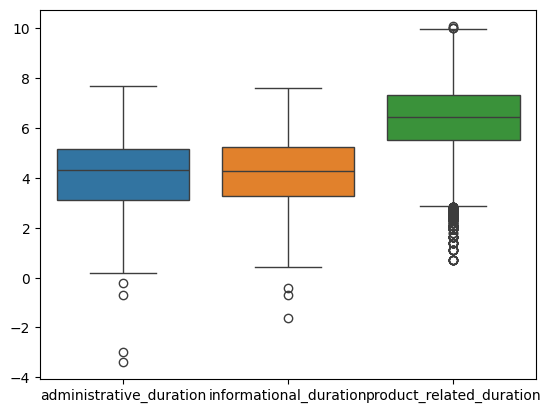

In [297]:
Plotter.boxplot(box_plot, duration_columns)

In [298]:
admin_time = sum(ca_data_cleaned['administrative_duration'])
product_time = sum(ca_data_cleaned['product_related_duration'])
info_time = sum(ca_data_cleaned['informational_duration'])
total_time = admin_time + product_time + info_time
info_percent = info_time/total_time*100
product_percent = product_time/total_time*100
admin_percent = admin_time/total_time*100
total_time_hours = total_time/60/60
print(f' the % spend on informational tasks is {info_percent} %')
print(f' the % spend on product tasks is {product_percent} %')
print(f' the % spend on administrative tasks is {admin_percent} %')
print(f' The total time spend on those tasks is {total_time_hours} hours.')

 the % spend on informational tasks is 2.5893934252081237 %
 the % spend on product tasks is 91.32919723064155 %
 the % spend on administrative tasks is 6.0814093441503205 %
 The total time spend on those tasks is 4431.183942197664 hours.


In [299]:
admin_count = np.count_nonzero(ca_data_cleaned['administrative_duration'])
product_count = np.count_nonzero(ca_data_cleaned['product_related_duration'])
info_count = np.count_nonzero(ca_data_cleaned['informational_duration'])
total_time = admin_time + product_time + info_time
print(f' the number of times an informational tasks was done is {info_count}')
print(f' the number of times a product tasks was done is {product_count}')
print(f' the number of times an administrative tasks was done is {admin_count}')


 the number of times an informational tasks was done is 2471
 the number of times a product tasks was done is 11573
 the number of times an administrative tasks was done is 6813


ML 4.1.4 Answer - 91.3% of the time is spend on product tasks, 6.1% spend on informational tasks, and 2.6% spend on administrative tasks, with a total of 4431h spend on those tasks. besides that, product tasks were also overwhelming done more than the others. We can see from the boxplot with 0 removed that also, that besides doing more product related tasks, that the average and mean time spend is also higher on product related tasks.

ML 4.1 question 5 - Are there any informational/administrative tasks which users spend time doing most?

<Axes: xlabel='administrative', ylabel='administrative_duration'>

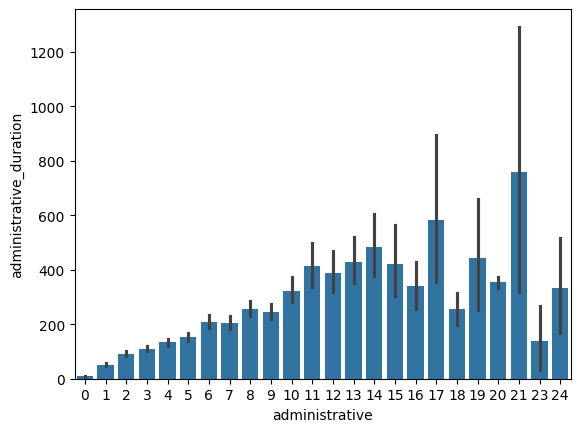

In [300]:
sns.barplot(data=ca_data_cleaned, y="administrative_duration", x="administrative")

<Axes: xlabel='informational', ylabel='informational_duration'>

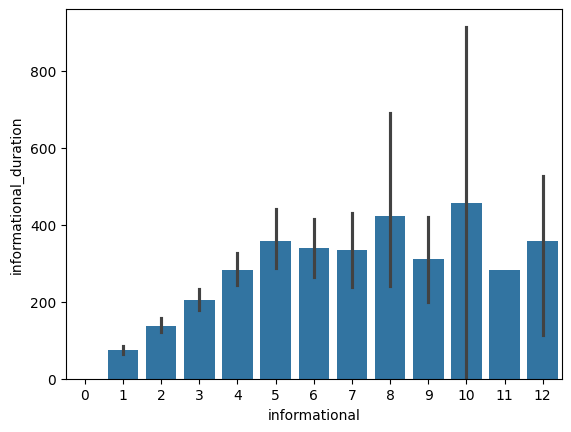

In [301]:
sns.barplot(data=ca_data_cleaned, y="informational_duration", x="informational")

ML 4.1.5 answer - On average users spend more time on informational tasks 8 and 10, altought there's high variability and several other informational tasks with close average time spent. On administrative tasks, there's similar high variability but there's an clear tasks with more time spent by users, tasks 21, followed by tasks 17 with several other tasks close by in terms of time spent to 17.

ML 4.1 question 6 - What is the breakdown of months making the most sales?

In [302]:
sales_month_df = ca_data_cleaned.iloc[:, 9:]  # still need to fix this to only show the 2 columns - NVM, just print the last collumn
sales_month = sales_month_df.groupby(['month']).sum() 
total_sales = sales_month_df['revenue'].sum()
print(f"The total number os sales is {total_sales}")
sales_month['proportion_sales_percentage'] = (sales_month['revenue']/total_sales) * 100 #WIP
display(sales_month['proportion_sales_percentage'])

The total number os sales is 1907


month
2      0.314630
3      9.491348
5     17.881489
6      1.101206
7      3.513372
8      3.880440
9      3.723125
10     6.974305
11    38.751966
12    14.368117
Name: proportion_sales_percentage, dtype: float64

ML 4.1.6 answer - Nov brings the most revenue, at 38.8%, followed by May at 17.9% and Dec at 14.4%. There's also increased sales on Mar accounting for around 9.5% and lastly Oct on 7%, but much reduced on the other months with Jan and Apr seeing no revenue at all

ML 4.2 questions:
                    - The count of the operating systems used to visit the site and the percentage of the total
                    - The amount of users visiting the site using mobile operating system and desktop operating systems
                    - The most commonly used browsers and their breakdown on mobile versus desktop

ML 4.2.1 question - The count of the operating systems used to visit the site and the percentage of the total

In [303]:
print(ca_data_cleaned['operating_systems'].value_counts())

operating_systems
Windows     6596
MACOS       2676
Android     2584
iOS          385
ChromeOS      62
Ubuntu         9
Other          7
Name: count, dtype: int64


In [304]:
total = ca_data_cleaned['operating_systems'].value_counts().sum()
OS_count = ca_data_cleaned['operating_systems'].value_counts()/total*100
print (OS_count)

operating_systems
Windows     53.543307
MACOS       21.722542
Android     20.975729
iOS          3.125254
ChromeOS     0.503288
Ubuntu       0.073058
Other        0.056823
Name: count, dtype: float64


<Axes: xlabel='operating_systems', ylabel='count'>

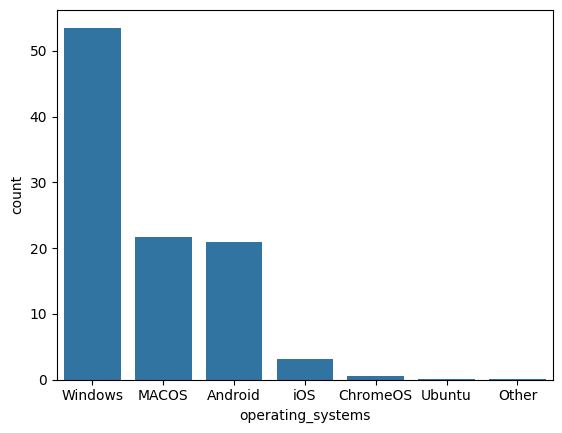

In [305]:
sns.barplot(x=OS_count.index, y=OS_count)

ML 4.2.1 anwser - Windows is the most used operating system, accounting for 53.5% of the visists. MACOS with 21.7% and Android with 21% follow. iOS accounting for 3.1% with all other option accounting for <1% combined.

ML 4.2 question 2 - The amount of users visiting the site using mobile operating system and desktop operating systems

In [306]:
Mobile_OS = ['Android', 'iOS']
Android_count = ca_data_cleaned['operating_systems'].value_counts().get('Android', 0)
iOS_count = ca_data_cleaned['operating_systems'].value_counts().get('iOS', 0)
Mobile_OS_count = ca_data_cleaned['operating_systems'].value_counts().get(Mobile_OS, 0)
print(Mobile_OS_count)
Mobile_OS_count_total = Android_count + iOS_count
Mobile_OS_percent = Mobile_OS_count_total/total*100
print(f'The amount of users using mobile operating systems is {Mobile_OS_count_total}.')
print(f'This accounts for {Mobile_OS_percent}% of the total visits.')

operating_systems
Android    2584
iOS         385
Name: count, dtype: int64
The amount of users using mobile operating systems is 2969.
This accounts for 24.100982222583% of the total visits.


In [307]:
desktop_OS = ['Windows', 'MACOS', 'ChromeOS', 'Ubuntu']
Windows_count = ca_data_cleaned['operating_systems'].value_counts().get('Windows', 0)
MACOS_count = ca_data_cleaned['operating_systems'].value_counts().get('MACOS', 0)
Chrome_count = ca_data_cleaned['operating_systems'].value_counts().get('ChromeOS', 0)
Ubuntu_count = ca_data_cleaned['operating_systems'].value_counts().get('Ubuntu', 0)
desktop_OS_count = ca_data_cleaned['operating_systems'].value_counts().get(desktop_OS, 0)
print(desktop_OS_count)
desktop_OS_count_total = Windows_count + MACOS_count + Chrome_count + Ubuntu_count
desktop_OS_percent = desktop_OS_count_total/total*100
print(f'The amount of users using desktop operating systems is {desktop_OS_count_total}.')
print(f'This accounts for {desktop_OS_percent}% of the total visits.')

operating_systems
Windows     6596
MACOS       2676
ChromeOS      62
Ubuntu         9
Name: count, dtype: int64
The amount of users using desktop operating systems is 9343.
This accounts for 75.84219498335904% of the total visits.


<Axes: >

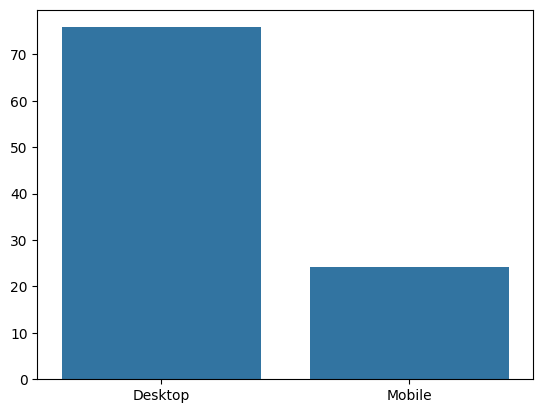

In [308]:
a = ['Desktop', 'Mobile']
b = [desktop_OS_percent , Mobile_OS_percent]
sns.barplot(x = a , y = b)

ML 4.2.2 Answer - The mobile OS, represents% of the visits, with 2969 users visits, whilst desktop OS represent 75.84% of the visits, or 9343 visits

ML 4.2 question 3 - The most commonly used browsers and their breakdown on mobile versus desktop

In [309]:

browser_count = ca_data_cleaned['browser'].value_counts()
browser_percent = browser_count/total*100
print (browser_count)
print (browser_percent)

browser
Google Chrome        7711
Safari               2526
Mozilla Firefox       830
Microsoft Edge        582
Internet Explorer     156
Samsung Internet      145
Opera                 136
Android               121
QQ                     53
Sogou Explorer         47
Yandex                  8
UC Browser              2
Undetermined            2
Name: count, dtype: int64
browser
Google Chrome        62.594366
Safari               20.504911
Mozilla Firefox       6.737560
Microsoft Edge        4.724409
Internet Explorer     1.266337
Samsung Internet      1.177044
Opera                 1.103986
Android               0.982223
QQ                    0.430230
Sogou Explorer        0.381524
Yandex                0.064940
UC Browser            0.016235
Undetermined          0.016235
Name: count, dtype: float64


<Axes: xlabel='browser', ylabel='count'>

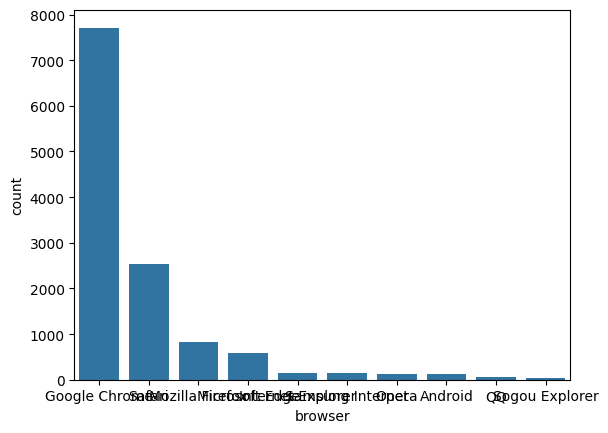

In [310]:
os_noutliers = ca_data_cleaned.copy()
os_noutliers = os_noutliers[os_noutliers['browser'] != 'Yandex']
os_noutliers = os_noutliers[os_noutliers['browser'] != 'UC Browser']
os_noutliers = os_noutliers[os_noutliers['browser'] != 'Undetermined']
browser_list = os_noutliers['browser'].value_counts()
sns.barplot(browser_list) #needs formatting to see labels

In [311]:
os_noutliers.groupby(['operating_systems', 'browser'], as_index=False).size()

,operating_systems,browser,size
0,Android,Android,116
1,Android,Google Chrome,2437
2,Android,Internet Explorer,10
3,Android,Microsoft Edge,5
4,Android,Mozilla Firefox,5
5,Android,QQ,7
6,Android,Sogou Explorer,1
7,ChromeOS,Google Chrome,17
8,ChromeOS,Microsoft Edge,3
9,ChromeOS,Safari,3


In [312]:
total_entries = len(os_noutliers['operating_systems'])
map_os = {'Android':'mobile', 'iOS':'mobile', 'MACOS': 'desktop','ChromeOS':'desktop','Windows':'desktop','Ubuntu':'desktop'}
browser_os = os_noutliers.copy()
browser_entries = browser_os.groupby(['browser']).size()
browser_os['operating_systems'] = browser_os['operating_systems'].map(map_os)
browser_os = browser_os.groupby(['browser','operating_systems']).size()
print (browser_os)
browser_os_percent = (browser_os/total_entries)*100
browser_os_detail = (browser_os/browser_entries)*100
print (browser_os_percent)
print (browser_os_detail)

browser            operating_systems
Android            desktop                 5
                   mobile                116
Google Chrome      desktop              5150
                   mobile               2561
Internet Explorer  desktop               142
                   mobile                 14
Microsoft Edge     desktop               566
                   mobile                 16
Mozilla Firefox    desktop               816
                   mobile                 13
Opera              desktop               130
                   mobile                  6
QQ                 desktop                45
                   mobile                  8
Safari             desktop              2295
                   mobile                225
Samsung Internet   desktop               139
                   mobile                  6
Sogou Explorer     desktop                46
                   mobile                  1
dtype: int64
browser            operating_systems
Android      

ML 4.2.3 Answer - Google Chrome akes the majority of the users, accounting for 62.6%, Safari 20.5%, with Firefox 6.7% getting and Edge 4.7%, with all the others accounting 5% together.
Chrome is breakdown into having 66.8% of it's users being on desktop, and 33.2% on mobile. All others have at least 90% on desktop besides Android, which is mostly used (95.9%) on mobile 

ML 4.2.4 - Based on this analysis of what are the most popular operating system, are there any regions where there is a discrepancy in what is popular? This could be an indication that users in that region are having technical issues that the tech team might want to investigate.

In [313]:
os_region = os_noutliers.copy()
map_reg = {'Africa':'Africa','Northern Africa':'Africa','Southern Africa':'Africa', 'Oceania': 'Oceania', 'Eastern Europe': 'Eastern Europe','Western Europe': 'Western Europe','Asia':'Asia','North America':'North America', 'South America':'South America'}
os_region['region'] = os_region['region'].map(map_reg)
os_region = os_region.groupby(['region', 'operating_systems']).size()
os_region_percent = (os_region/total_entries)*100
#print(os_region_percent)
os_region_entries = os_region.groupby(['region']).sum()
os_region_detail = (os_region/os_region_entries)*100
print (os_region_detail)

region          operating_systems
Africa          Android              19.135071
                ChromeOS              2.428910
                MACOS                16.765403
                Other                 0.059242
                Ubuntu                0.059242
                Windows              59.360190
                iOS                   2.191943
Asia            Android              22.388060
                ChromeOS              0.263389
                MACOS                22.914838
                Other                 0.087796
                Windows              51.360843
                iOS                   2.985075
Eastern Europe  Android              24.284475
                ChromeOS              0.260191
                MACOS                18.039896
                Other                 0.173461
                Windows              54.032958
                iOS                   3.209020
North America   Android              19.032922
                ChromeOS  

ML 4.2.4 answer - As when seen above on question 4.2.1, windows is the most used globally and also on every region, with at least 50% share on each. Android and MACOS, whilst on similar levels globally, do have some differences depending on region, with south America, eastern Europe, Africa and Oceania having slightly more Android users than MACOS, and then north America with slightly more MACOS relatively to android.

ML 4.3 questions:
                    - Visualise what traffic is currently generating the most revenue broken down by region
                    - What traffic has the highest bounce rate? This could indicate that the marketing channels advertisement isn't enticing enough for the customers. Conversely a low bounce rate can indicate that the strategy is highly effective. Break down this data by region.
                    - Check what months have generated the most sales from ads traffic

In [314]:
os_region_entries = os_region.groupby(['region']).size()
os_region_detail = (os_region/os_region_entries)
print (os_region_detail)

region          operating_systems
Africa          Android               46.142857
                ChromeOS               5.857143
                MACOS                 40.428571
                Other                  0.142857
                Ubuntu                 0.142857
                Windows              143.142857
                iOS                    5.285714
Asia            Android               42.500000
                ChromeOS               0.500000
                MACOS                 43.500000
                Other                  0.166667
                Windows               97.500000
                iOS                    5.666667
Eastern Europe  Android               46.666667
                ChromeOS               0.500000
                MACOS                 34.666667
                Other                  0.333333
                Windows              103.833333
                iOS                    6.166667
North America   Android              132.142857
      

ML 4.3.1 - - Visualise what traffic is currently generating the most revenue broken down by region

In [315]:
browser_count = ca_data_cleaned['traffic_type'].value_counts()
browser_percent = browser_count/total*100
print (browser_count)
print (browser_percent)

traffic_type
Google search          3985
Facebook ads           2319
Instagram ads          2193
Bing search            1173
Youtube ads             642
Twitter                 474
Affiliate marketing     409
Youtube channel         401
Instagram Page          229
Direct Traffic          207
Tik Tok ads             142
Yahoo Search             43
Facebook page            30
Yandex search            21
Newsletter               16
Tik Tok page             13
DuckDuckGo search        10
Pinterest                 6
Other                     6
Name: count, dtype: int64
traffic_type
Google search          32.348405
Facebook ads           18.824580
Instagram ads          17.801770
Bing search             9.521877
Youtube ads             5.211462
Twitter                 3.847715
Affiliate marketing     3.320075
Youtube channel         3.255134
Instagram Page          1.858917
Direct Traffic          1.680331
Tik Tok ads             1.152691
Yahoo Search            0.349054
Facebook page       

<Axes: xlabel='traffic_type', ylabel='count'>

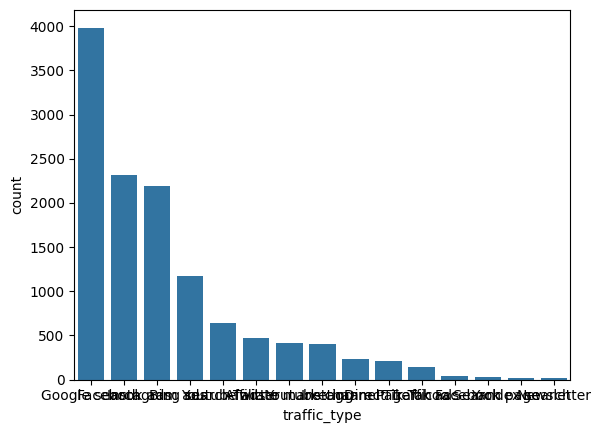

In [316]:
tt_noutliers = ca_data_cleaned.copy()
tt_noutliers = tt_noutliers[tt_noutliers['traffic_type'] != 'Tik Tok page']
tt_noutliers = tt_noutliers[tt_noutliers['traffic_type'] != 'DuckDuckGo search']
tt_noutliers = tt_noutliers[tt_noutliers['traffic_type'] != 'Other']
tt_noutliers = tt_noutliers[tt_noutliers['traffic_type'] != 'Pinterest']
traffic_list = tt_noutliers['traffic_type'].value_counts()
sns.barplot(traffic_list) #needs size formatting to see labels

In [317]:
tt_region = tt_noutliers.copy()
tt_region['region'] = tt_region['region'].map(map_reg)
tt_region_sum = tt_region.groupby(['traffic_type','region']).sum() 
total_revenue = tt_region_sum['revenue'].sum()
tt_region_sum['%_total_revenue'] = (tt_region_sum['revenue']/total_revenue)*100

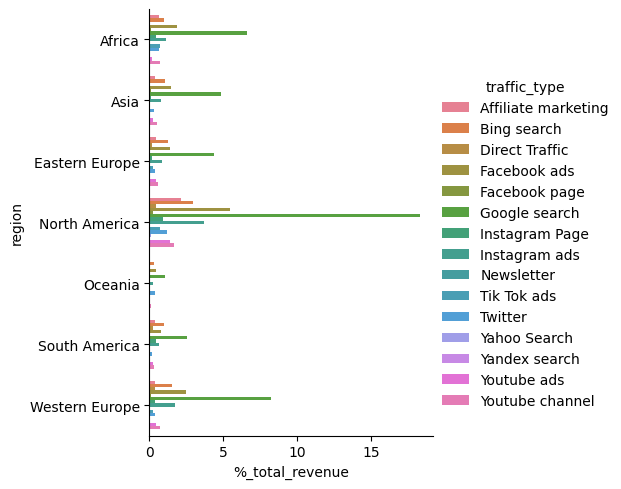

In [318]:
sns.catplot(y='region', x='%_total_revenue', hue='traffic_type', data=tt_region_sum, kind='bar') #needs new colour scheme to better see different columns
plt.show()  #do they want this as percentage of the total or as percentage of the region??

ML 4.3.1 answer -Google search brings the most revenue, with facebook ads and instagram ads following gloabally. breaking to regions, bing search seems to come 2nd place in south America, and 3rd beating instagram ads in Africa, Asia and Eastern Europe. Overall north America still takes the most % of the total, with google search alone accounting for nearly 20% of the total revenue.

ML 4.3.2 - What traffic has the highest bounce rate? This could indicate that the marketing channels advertisement isn't enticing enough for the customers. Conversely a low bounce rate can indicate that the strategy is highly effective. 
        Break down this data by region.

In [319]:
bounce_tt = tt_noutliers.copy()
bounce_tt['bounce_rates_relative'] = (bounce_tt['bounce_rates']/0.2)
bounce_tt['region'] = bounce_tt['region'].map(map_reg)

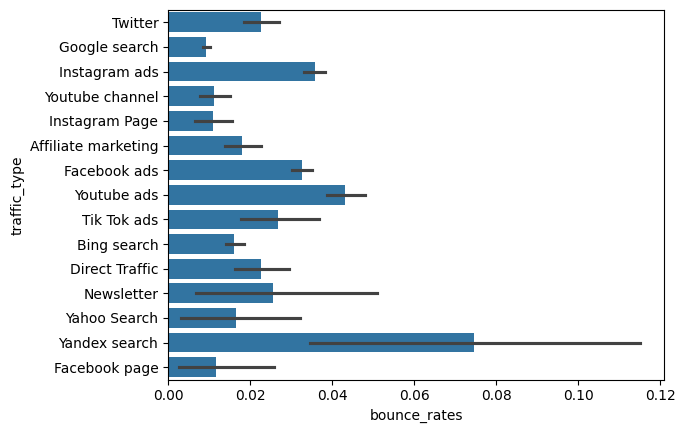

In [320]:
sns.barplot(y=bounce_tt['traffic_type'], x=bounce_tt['bounce_rates'])
plt.show()

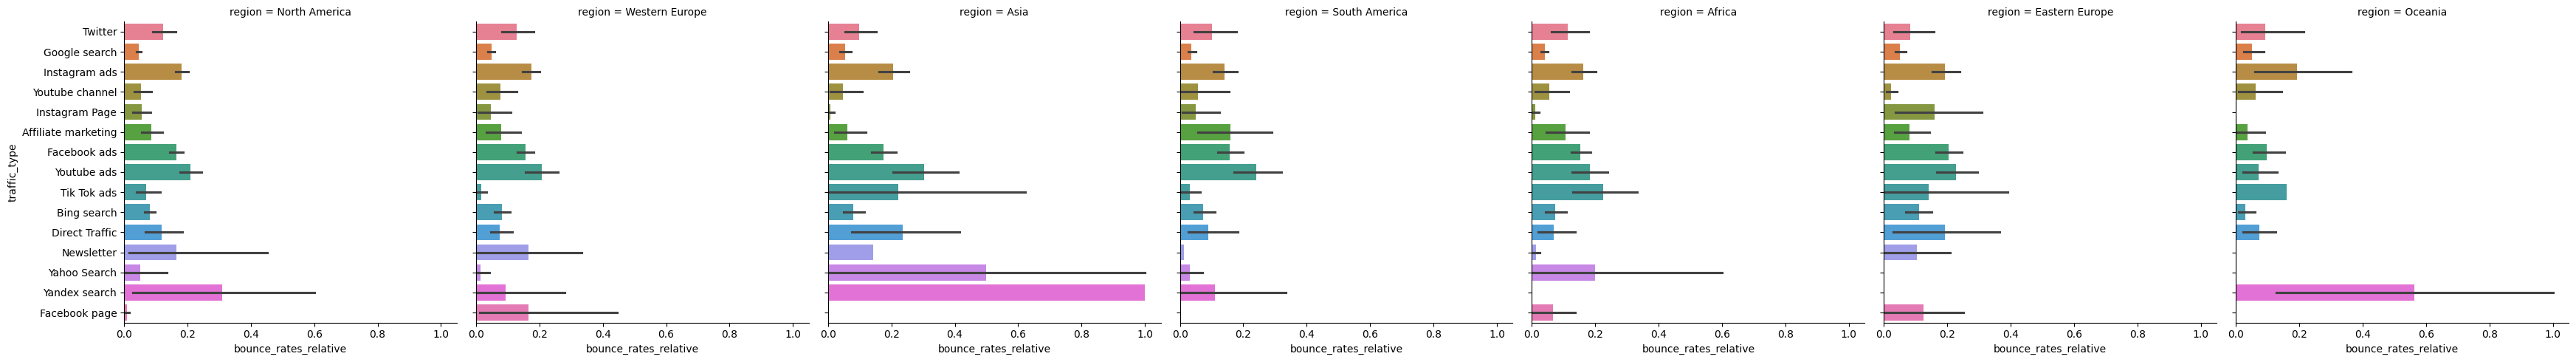

In [321]:
fg2 = sns.catplot(data=bounce_tt, col='region', y='traffic_type', x='bounce_rates_relative', kind='bar', hue='traffic_type', aspect=1)
plt.show()

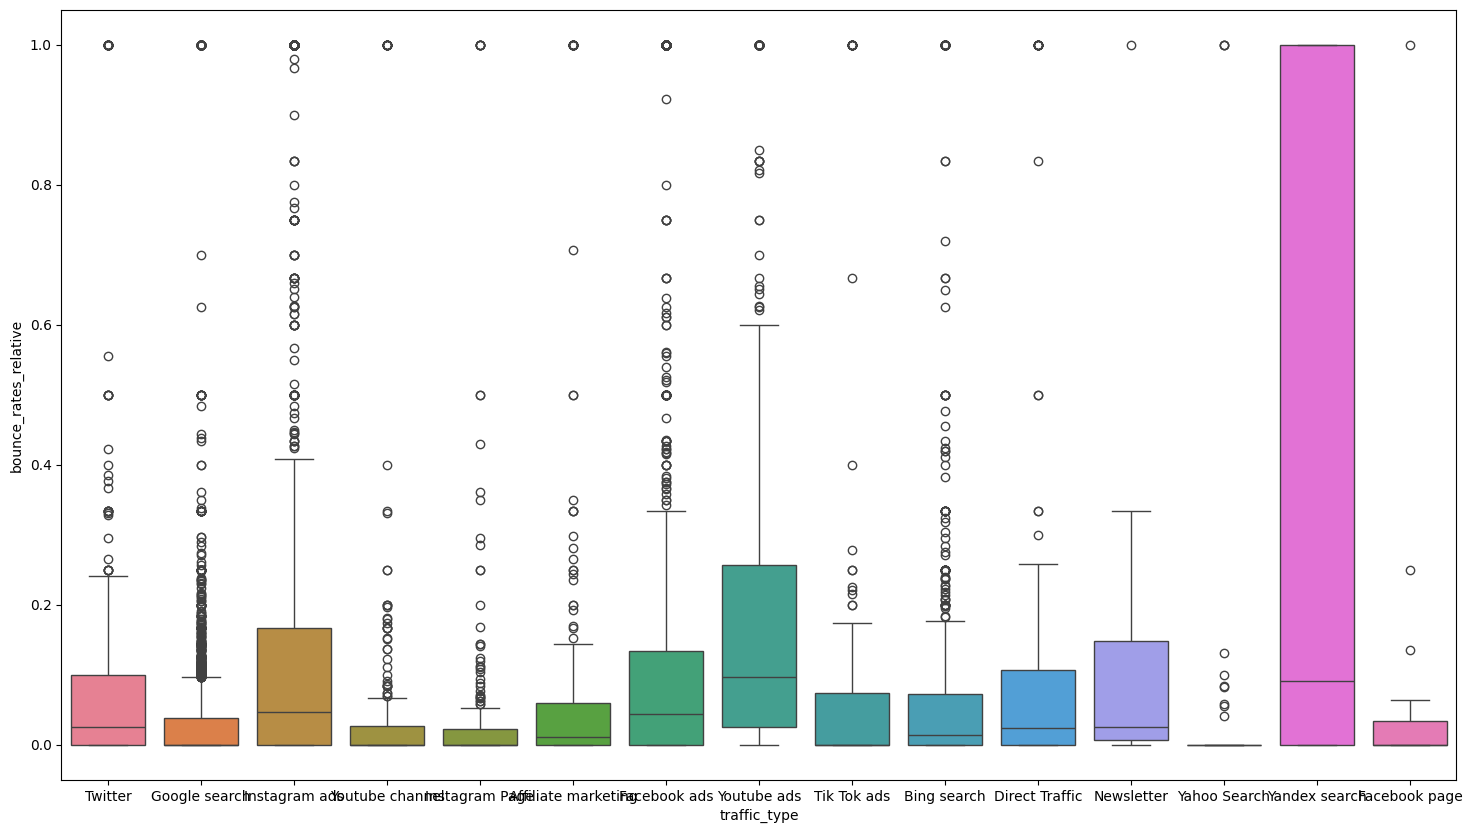

In [322]:
plt.figure(figsize=(18, 10))
bounce = sns.boxplot(x='traffic_type', y='bounce_rates_relative', data=bounce_tt, hue = 'traffic_type')
plt.show()

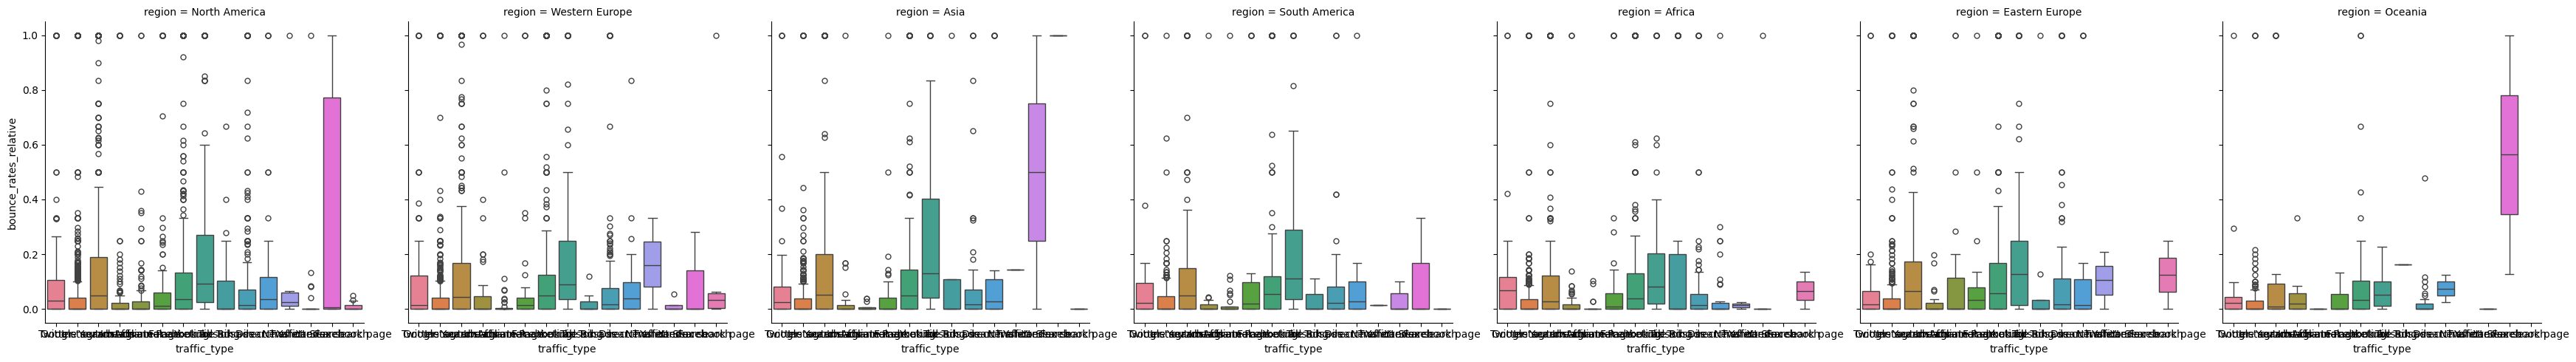

In [323]:
sns.catplot(data=bounce_tt, col='region', x='traffic_type', y='bounce_rates_relative', kind='box', hue = 'traffic_type')
plt.show()

ML 4.3.2 answer - Yandex search seems to be the one with the highest bounce rates, but, looking at the value counts for traffic type and relative %, it only amounts for 0.17% of the total traffic.
Looking at the ones with at least 1% of the total, youtube ads seem to have the highest bounce rates in general, followed by instagram ads and facebook ads. It's also 1st in all regions except africa, where tiktok ads reaches a higher bounce rate, and Oceania, where instagram ads come first within the >1%.

ML 4.3.3 - Check what months have generated the most sales from ads traffic

In [324]:
ads_traffic = ['Facebook ads','Instagram ads','Tik Tok ads','Youtube ads']
#customer_activity_df.info()
#ca_data_cleaned.info()
month_ads = ca_data_cleaned.copy()  # still can't make this work with ca_data_cleaned. printing the .info of both, something to do with the type of category, either obejct or bool
total_revenue = month_ads['revenue'].sum()
month_ads = month_ads.loc[month_ads['traffic_type'].isin(ads_traffic)]

month_ads_1 = month_ads.groupby(['month']).sum()
month_ads_1['proportion_sales_percentage'] = (month_ads_1['revenue']/total_revenue) * 100
print(month_ads_1['proportion_sales_percentage'])

month
2      0.104877
3      3.198741
5      4.509701
6      0.367069
7      1.310960
8      0.576822
9      0.891453
10     1.992659
11    11.012061
12     3.723125
Name: proportion_sales_percentage, dtype: float64


<Axes: xlabel='month', ylabel='proportion_sales_percentage'>

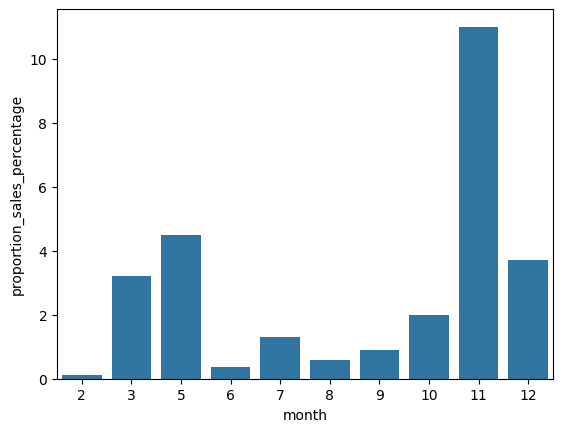

In [325]:
sns.barplot(x=month_ads_1.index, y=month_ads_1['proportion_sales_percentage'])

ML 4.3.3 answer - Nov has generated the most ravenue from ads traffic with, 11%. Once again followed by May 4.5%, Dec 3.7% and Mar 3.2%, with the rest of the months with low values, and as expected, since there was no revenue on Jan and Apr as seen before, also not represented here

ML 4.4 questions - Which region is currently generating the most/least revenue?
                 - What percentage of our returning/new customers are making a purchase when they visit the site?
                 - Are sales being made more on weekends comparatively to weekdays?
                 - Which months have been the most effective for generating sales?
                 - Is direct/social or advertising traffic contributing heavily to sales?

ML 4.4.1 - Which region is currently generating the most/least revenue? 

In [326]:
#what's the difference between this question and ML 4.1.2? is 4.1.2 currently meaning the last month and this one the whole data range?
region_sales_df = ca_data_cleaned.iloc[:, 12:] 
region_sales = region_sales_df.groupby(['region']).sum()
total_region_sales = region_sales_df['revenue'].sum()
print(f"The total number os sales is {total_region_sales}")
region_sales['proportion_sales_percentage'] = (region_sales['revenue']/total_region_sales) * 100
display(region_sales['proportion_sales_percentage'])

The total number os sales is 1907


region
Africa              6.816990
Asia                9.805978
Eastern Europe     10.225485
North America      39.381227
Northern Africa     4.771893
Oceania             2.674358
South America       6.816990
Southern Africa     2.569481
Western Europe     16.937598
Name: proportion_sales_percentage, dtype: float64

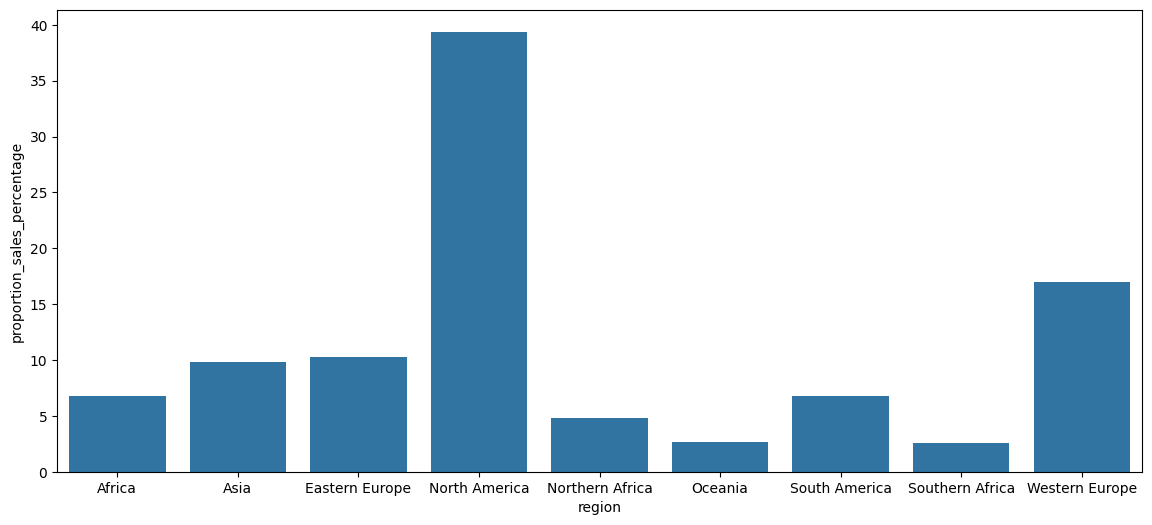

In [327]:
plt.figure(figsize=(14, 6))
sns.barplot(x=region_sales.index, y=region_sales['proportion_sales_percentage'])
plt.show()

ML 4.4.1 answer - north America with 39.4% leads in revenue, with western Europe in 2nd accounting for 16.9%. On the other end of the scale, southern Africa with 2.6% and Oceania with 2.7% account for the least amount of revenue

ML 4.4.2 - What percentage of our returning/new customers are making a purchase when they visit the site?

In [328]:
customer = ca_data_cleaned.copy()
counts_visitors = customer['visitor_type'].value_counts()
customer = customer.groupby(['visitor_type']).sum()
customer = customer.join(counts_visitors)
customer['purchase_%'] = (customer['revenue'] / customer['count'])*100
customer['customer_%'] = (customer['count']/total)*100
customer['revenue_%'] = (customer['revenue'] / total_sales)*100
display(customer['purchase_%'])
display(customer['customer_%'])
display(customer['revenue_%'])

visitor_type
New_Visitor          24.186343
Other                15.942029
Returning_Visitor    14.200131
Name: purchase_%, dtype: float64

visitor_type
New_Visitor          12.720188
Other                 0.560110
Returning_Visitor    86.719701
Name: customer_%, dtype: float64

visitor_type
New_Visitor          19.874148
Other                 0.576822
Returning_Visitor    79.549030
Name: revenue_%, dtype: float64

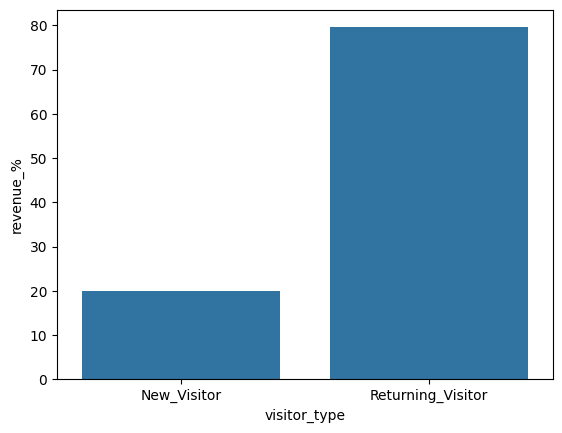

In [329]:
customer = customer[customer.index != 'Other']
sns.barplot(x=customer.index, y=customer['revenue_%'])
plt.show()

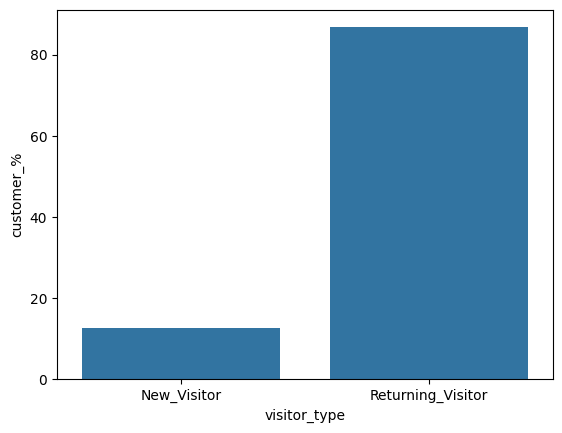

In [330]:
customer = customer[customer.index != 'Other']
sns.barplot(x=customer.index, y=customer['customer_%'])
plt.show()

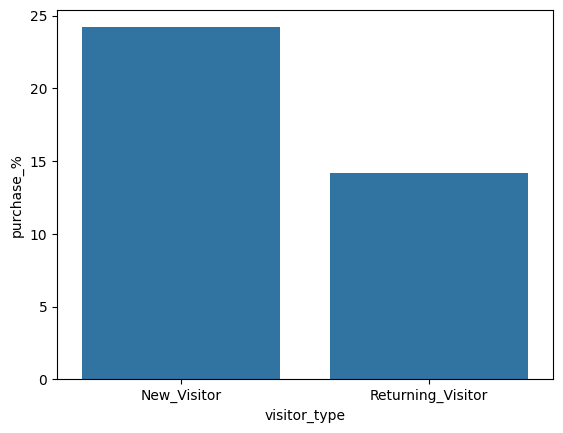

In [331]:
customer = customer[customer.index != 'Other']
sns.barplot(x=customer.index, y=customer['purchase_%'])
plt.show()

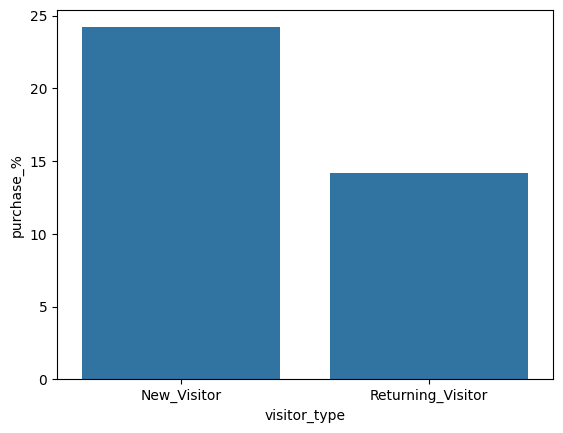

In [332]:
customer = customer[customer.index != 'Other']
sns.barplot(x=customer.index, y=customer['purchase_%'])
plt.show()

ML 4.4.2 answer - Our new visitors are making a purchase on 24.2% of the visits they make, whilst returning visitors are making a purchase on 15.9% of their visits, but returning visitors account for an overwhelming majority of the visits (86.7%) and purchases (79.5%). There's also a 3rd category of other visitors, amking a purchase on 16% of the cases, but they only acount for 0.56% of the total.

ML 4.4.3 - Are sales being made more on weekends comparatively to weekdays?

In [333]:
# Once again, how is this much different form ML 4.1.1?? I'm missing something?
sales_weekends_df = ca_data_cleaned.iloc[:,15:]
weekend_effect = sales_weekends_df.groupby(['weekend']).sum()
total_sales = sales_weekends_df['revenue'].sum()
print(f"The total number os sales is {total_sales}")
weekend_effect['proportion_sales_percentage'] = (weekend_effect['revenue']/total_sales) * 100
weekend_effect.head()

The total number os sales is 1907


,revenue,proportion_sales_percentage
weekend,,
0,1476,77.399056
1,431,22.600944


In [334]:
weekend_sales = sales_weekends_df.groupby(['weekend']).sum()
per_day_week = weekend_sales['revenue']/5
per_day_weekend = weekend_sales['revenue']/2
print(f'revenue peer day of week is:{per_day_week.iloc[0]}')
print(f'revenue peer day of weekend is:{per_day_weekend.iloc[1]}')

revenue peer day of week is:295.2
revenue peer day of weekend is:215.5


<Axes: xlabel='weekend', ylabel='proportion_sales_percentage'>

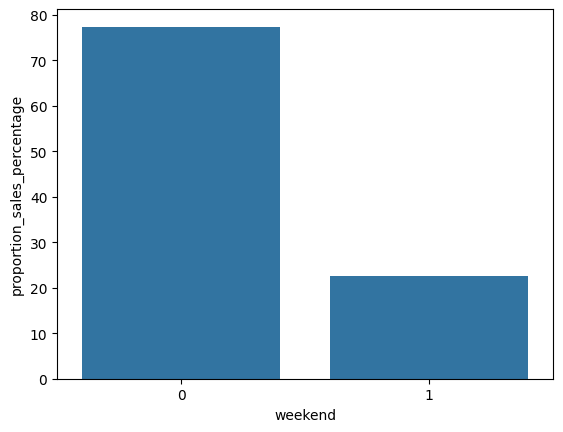

In [335]:
sns.barplot(x=weekend_effect.index, y=weekend_effect['proportion_sales_percentage'])

ML 4.4.3 answer - 77.4% of the sales occour during the week, with 22.6 during the weekend, but when compared on a per day basis, even thou still more profitable, the difference is much reduced, with weekdays bringing 295.2 revenue per day, compared with 215.5 per day during the weekend, still 37% more per day.

ML 4.4.4 - Which months have been the most effective for generating sales?

In [336]:
# isn't this once again just a repeat of ML 4.1.6?
sales_month_df = ca_data_cleaned.iloc[:, 9:]  # still need to fix this to only show the 2 columns - NVM, just print the last collumn
sales_month = sales_month_df.groupby(['month']).sum() 
total_sales = sales_month_df['revenue'].sum()
print(f"The total number os sales is {total_sales}")
sales_month['proportion_sales_percentage'] = (sales_month['revenue']/total_sales) * 100 #WIP
display(sales_month['proportion_sales_percentage'])

The total number os sales is 1907


month
2      0.314630
3      9.491348
5     17.881489
6      1.101206
7      3.513372
8      3.880440
9      3.723125
10     6.974305
11    38.751966
12    14.368117
Name: proportion_sales_percentage, dtype: float64

<Axes: xlabel='month', ylabel='proportion_sales_percentage'>

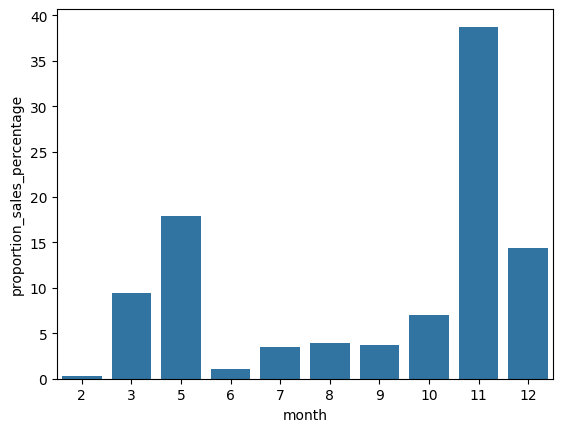

In [337]:
sns.barplot(x=sales_month.index, y=sales_month['proportion_sales_percentage'])

ML 4.4.4 answer - Novemeber and May brought the most revenue, with 38.8% and 17.9% of the total, followed by December with 14.4%

ML 4.4.5 - Is direct/social or advertising traffic contributing heavily to sales?

In [338]:
browser_count = ca_data_cleaned['traffic_type'].value_counts()
browser_percent = browser_count/total*100
print (browser_count)
print (browser_percent)

traffic_type
Google search          3985
Facebook ads           2319
Instagram ads          2193
Bing search            1173
Youtube ads             642
Twitter                 474
Affiliate marketing     409
Youtube channel         401
Instagram Page          229
Direct Traffic          207
Tik Tok ads             142
Yahoo Search             43
Facebook page            30
Yandex search            21
Newsletter               16
Tik Tok page             13
DuckDuckGo search        10
Pinterest                 6
Other                     6
Name: count, dtype: int64
traffic_type
Google search          32.348405
Facebook ads           18.824580
Instagram ads          17.801770
Bing search             9.521877
Youtube ads             5.211462
Twitter                 3.847715
Affiliate marketing     3.320075
Youtube channel         3.255134
Instagram Page          1.858917
Direct Traffic          1.680331
Tik Tok ads             1.152691
Yahoo Search            0.349054
Facebook page       

In [339]:
map_tt = {'Google search':'Search traffic','DuckDuckGo search':'Search traffic','Yandex search':'Search traffic','Bing search':'Search traffic','Yahoo search':'Search traffic','Newsletter':'Direct traffic','Direct Traffic':'Direct traffic','Affiliate marketing':'Direct traffic','Pinterest':'Social traffic','Twitter':'Social traffic','Facebook page':'Social traffic','Instagram page':'Social traffic','Tik Tok page':'Social traffic','Tik Tok ads':'Ads traffic','Instagram ads':'Ads traffic','Youtube ads':'Ads traffic','Facebook ads':'Ads traffic'}
tt_sales = ca_data_cleaned.copy()
tt_sales['traffic_type'] = tt_sales['traffic_type'].map(map_tt)
tt_sales_sum = tt_sales.groupby(['traffic_type','revenue']).size()
tt_sales = tt_sales.groupby(['traffic_type']).sum()
total_tt_sales = tt_sales['revenue'].sum()
tt_sales['revenue_%'] = (tt_sales['revenue']/total_tt_sales)*100
print (tt_sales_sum)
print(tt_sales['revenue_%'])

traffic_type    revenue
Ads traffic     0          4768
                1           528
Direct traffic  0           522
                1           110
Search traffic  0          4141
                1          1048
Social traffic  0           443
                1            80
dtype: int64
traffic_type
Ads traffic       29.898075
Direct traffic     6.228766
Search traffic    59.343148
Social traffic     4.530011
Name: revenue_%, dtype: float64


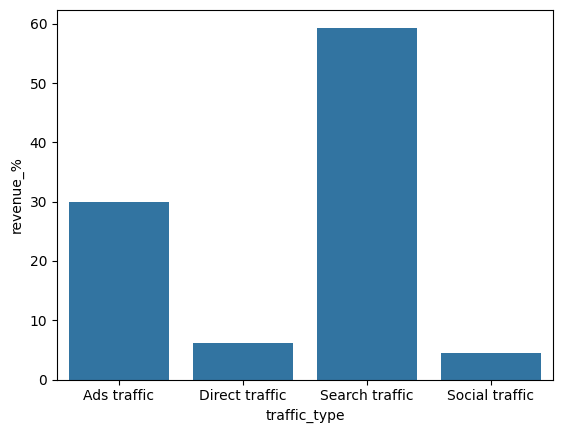

In [340]:
sns.barplot(y=tt_sales['revenue_%'], x=tt_sales.index)
plt.show()

ML 4.4.5 answer - Direct/social are contributing 6.2% and 4.5% respectively, with ads contributing 29.9%. the rest 59.3% comes from search traffic